<a href="https://colab.research.google.com/github/talitmr/VAE_GAN/blob/main/2Layer_FC_AE_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A two-layer fully connected autoencoder on MNIST handwritten digits dataset without any deep learning libraries, using numpy only

# 1) Boilerplate, imports, data loading

In [ ]:
from test_utils import load_dataset, test_relu, test_sigmoid, test_mean_squared_error, test_sigmoid_backward, test_weights
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load_dataset function; 
# - takes training set of MNIST dataset from torch datasets,
# - flattens 28x28 images to 784 dimensional vectors
# - scales training instances between 0 and 1

X = load_dataset()
X = X/255

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

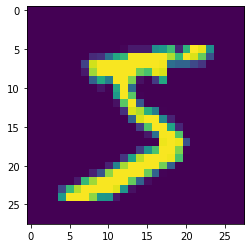

In [ ]:
#visualize 1 sample
plt.imshow(X[0].reshape(28,28))
plt.show()

# 2) Initialize Weights



Randomly initialize layer 1 and layer 2 weights as 2D numpy arrays with zero mean and 0.01 standard deviation. For simplicity, biases are omitted.

In [ ]:
INPUT_SIZE  = X.shape[1]
HIDDEN_SIZE = 64

w1 = np.random.normal(loc=0, scale=0.01, size=(INPUT_SIZE,HIDDEN_SIZE))
w2 = np.random.normal(loc=0, scale=0.01, size=(HIDDEN_SIZE,INPUT_SIZE))

print('w1 shape is {}'.format(w1.shape))
print('w2 shape is {}'.format(w2.shape))

w1 shape is (784, 64)
w2 shape is (64, 784)


# 3) Define activation functions 

In this part, we will define the necessary function in numpy. Note that all functions need to operate on batches, not single instances. As a convention, first dimension of all tensors will be the batch dimension. 

Define relu and sigmoid activation functions in forward mode.

In [ ]:
def relu(x):
  return np.maximum(0,x)

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

# 4.a) Define activation functions in 'backward mode'
Suppose you know the derivative of a function's output with respect to the loss, which is $\frac{\partial loss}{\partial f(x)}$. Backward mode of a function takes $\frac{\partial loss}{\partial f(x)}$ (```D_output``` argument) and gives derivatives of its input with respect to the loss $\frac{\partial loss}{\partial x}$. 

Backward mode of relu is defined below. Using this as an example, sigmoid activation function in backward mode. You are going to use these functions to implement backpropagation. 



In [ ]:
#Note: If you are confused about D_output means, read the notes at the top of the page.
def relu_backward(D_output, output):
    '''
    relu_backward: Backward mode of relu activation function
    
    Arguments;
    D_output: Derivative of output of relu with respect to loss.
    output  : Output of relu activation function
    
    Returns;
    Derivative of input of relu function with respect to loss.
    '''
    dZ = np.array(D_output, copy=True)
    dZ[output <= 0] = 0
    #dZ[output > 0] = 1
    return dZ


In [ ]:
def sigmoid_backward(D_output, output):    
    '''
    sigmoid_backward: Backward mode of sigmoid activation function
    
    Arguments;
    D_output: Derivative of output of sigmoid with respect to loss.
    output  : Output of sigmoid activation function
    
    Returns;
    Derivative of input of sigmoid function with respect to loss.
    '''
    
    dZ = D_output * output * (1-output)
    return dZ

# 4.b) Define loss function


Define the function computing mean squared error metric, given outputs and targets.

In [ ]:
def mean_squared_error(outputs, targets):
    squared_errors = np.square(np.subtract(targets,outputs)).mean()
    return np.mean(squared_errors)

# 5) Sanity Check
Since Part 6 will be a little more difficult than the other parts, make sure everything is correct so far using test scripts before proceeding Part 6,(just run the cell below). If anything is incorrect with your implementations, do not start implementing part 6 before fixing the mistakes and making sure everything works as intended.

Note: Don't forget to run cells after making changes in them or you may re-test your old implementations unintentionally.

In [ ]:
test_weights(w1, w2, INPUT_SIZE, HIDDEN_SIZE)
test_relu(relu)
test_sigmoid(sigmoid)
test_sigmoid_backward(sigmoid_backward)
test_mean_squared_error(mean_squared_error)

Weights are initialized properly.
'relu' is implemented properly.
'sigmoid' is implemented properly.
'sigmoid_backward' is implemented properly.
'mean_squared_error' is implemented properly.


# 6) Training

Set hyperparameters

In [ ]:
BATCH_SIZE = 1024
NUM_EPOCHS = 20
LEARNING_RATE = 0.0001

Calculate how many iterations will be done per epoch.

Hint: You may want to use `//` operator, which does integer division in Python 3.

In [ ]:
NUM_TRAINING_INSTANCES = X.shape[0]

In [ ]:
ITERATIONS_PER_EPOCH =  NUM_TRAINING_INSTANCES // BATCH_SIZE

Training loop mainly consists of 4 steps

1) Sample batch from dataset

2) Forward propagation

3) Backpropagation

4) Parameter updates

1st and 4th steps are implemented. You are expected to implement forward propagation and backpropagation using the functions you defined above. 

- You can use ```@``` operator or ```np.dot``` function for matrix multiplication.
- Note that you have implemented every backward operation needed, except matrix multiplication. Find out what is the backward mode of matrix multiplication operation. Or derive it, if you feel adventurous.

Epoch 1, Iteration 0 -- Loss: 0.231433


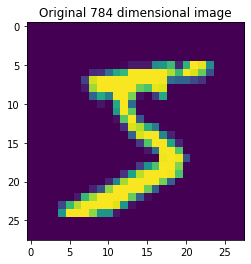

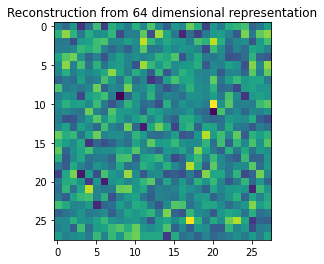

Epoch 1, Iteration 1 -- Loss: 0.231015
Epoch 1, Iteration 2 -- Loss: 0.219894
Epoch 1, Iteration 3 -- Loss: 0.103798
Epoch 1, Iteration 4 -- Loss: 0.081450
Epoch 1, Iteration 5 -- Loss: 0.107972
Epoch 1, Iteration 6 -- Loss: 0.096933
Epoch 1, Iteration 7 -- Loss: 0.092019
Epoch 1, Iteration 8 -- Loss: 0.092814
Epoch 1, Iteration 9 -- Loss: 0.090431
Epoch 1, Iteration 10 -- Loss: 0.088169


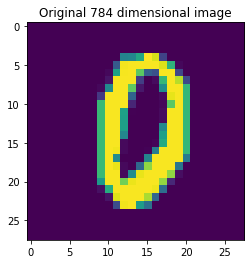

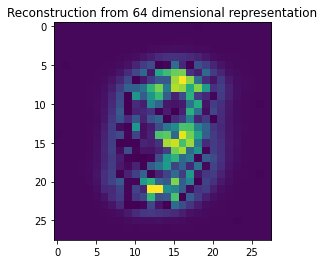

Epoch 1, Iteration 11 -- Loss: 0.080404
Epoch 1, Iteration 12 -- Loss: 0.082939
Epoch 1, Iteration 13 -- Loss: 0.081180
Epoch 1, Iteration 14 -- Loss: 0.074055
Epoch 1, Iteration 15 -- Loss: 0.073557
Epoch 1, Iteration 16 -- Loss: 0.073260
Epoch 1, Iteration 17 -- Loss: 0.069577
Epoch 1, Iteration 18 -- Loss: 0.072044
Epoch 1, Iteration 19 -- Loss: 0.076460
Epoch 1, Iteration 20 -- Loss: 0.073776


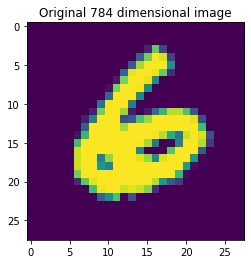

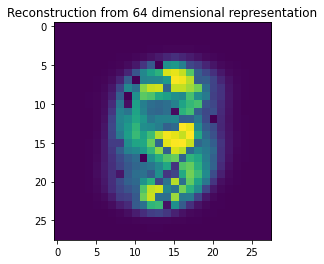

Epoch 1, Iteration 21 -- Loss: 0.072666
Epoch 1, Iteration 22 -- Loss: 0.072485
Epoch 1, Iteration 23 -- Loss: 0.069249
Epoch 1, Iteration 24 -- Loss: 0.067646
Epoch 1, Iteration 25 -- Loss: 0.066129
Epoch 1, Iteration 26 -- Loss: 0.067508
Epoch 1, Iteration 27 -- Loss: 0.065924
Epoch 1, Iteration 28 -- Loss: 0.064490
Epoch 1, Iteration 29 -- Loss: 0.064513
Epoch 1, Iteration 30 -- Loss: 0.063601


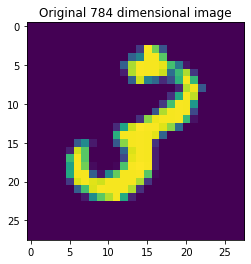

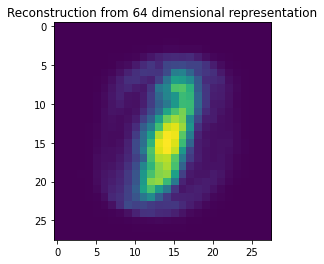

Epoch 1, Iteration 31 -- Loss: 0.064214
Epoch 1, Iteration 32 -- Loss: 0.059579
Epoch 1, Iteration 33 -- Loss: 0.058170
Epoch 1, Iteration 34 -- Loss: 0.058506
Epoch 1, Iteration 35 -- Loss: 0.062012
Epoch 1, Iteration 36 -- Loss: 0.060548
Epoch 1, Iteration 37 -- Loss: 0.058769
Epoch 1, Iteration 38 -- Loss: 0.059280
Epoch 1, Iteration 39 -- Loss: 0.056935
Epoch 1, Iteration 40 -- Loss: 0.055627


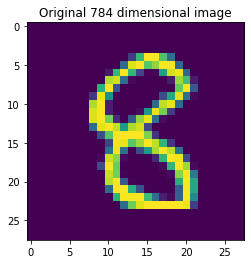

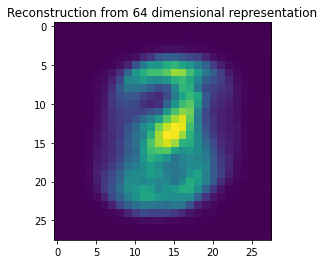

Epoch 1, Iteration 41 -- Loss: 0.053609
Epoch 1, Iteration 42 -- Loss: 0.049831
Epoch 1, Iteration 43 -- Loss: 0.050873
Epoch 1, Iteration 44 -- Loss: 0.050744
Epoch 1, Iteration 45 -- Loss: 0.049659
Epoch 1, Iteration 46 -- Loss: 0.051569
Epoch 1, Iteration 47 -- Loss: 0.052725
Epoch 1, Iteration 48 -- Loss: 0.052080
Epoch 1, Iteration 49 -- Loss: 0.048349
Epoch 1, Iteration 50 -- Loss: 0.048697


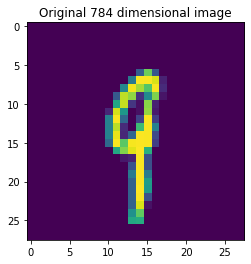

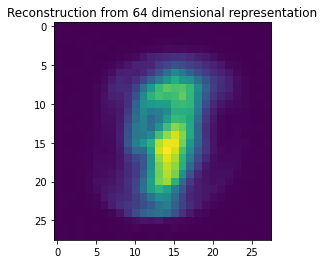

Epoch 1, Iteration 51 -- Loss: 0.045357
Epoch 1, Iteration 52 -- Loss: 0.047521
Epoch 1, Iteration 53 -- Loss: 0.048582
Epoch 1, Iteration 54 -- Loss: 0.046957
Epoch 1, Iteration 55 -- Loss: 0.047455
Epoch 1, Iteration 56 -- Loss: 0.045642
Epoch 1, Iteration 57 -- Loss: 0.043459
Epoch 2, Iteration 58 -- Loss: 0.043107


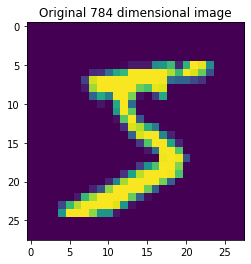

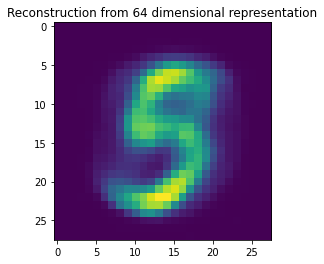

Epoch 2, Iteration 59 -- Loss: 0.045448
Epoch 2, Iteration 60 -- Loss: 0.045012
Epoch 2, Iteration 61 -- Loss: 0.042889
Epoch 2, Iteration 62 -- Loss: 0.044600
Epoch 2, Iteration 63 -- Loss: 0.044200
Epoch 2, Iteration 64 -- Loss: 0.044059
Epoch 2, Iteration 65 -- Loss: 0.044197
Epoch 2, Iteration 66 -- Loss: 0.043405
Epoch 2, Iteration 67 -- Loss: 0.043830
Epoch 2, Iteration 68 -- Loss: 0.042717


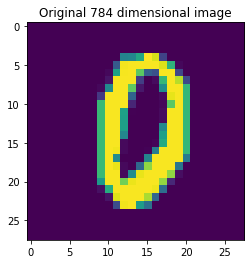

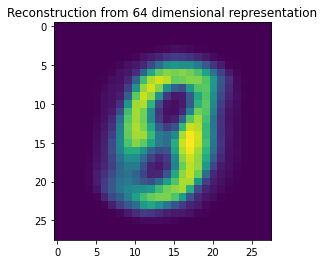

Epoch 2, Iteration 69 -- Loss: 0.041551
Epoch 2, Iteration 70 -- Loss: 0.046885
Epoch 2, Iteration 71 -- Loss: 0.045863
Epoch 2, Iteration 72 -- Loss: 0.043634
Epoch 2, Iteration 73 -- Loss: 0.040954
Epoch 2, Iteration 74 -- Loss: 0.040397
Epoch 2, Iteration 75 -- Loss: 0.038559
Epoch 2, Iteration 76 -- Loss: 0.040117
Epoch 2, Iteration 77 -- Loss: 0.040967
Epoch 2, Iteration 78 -- Loss: 0.039444


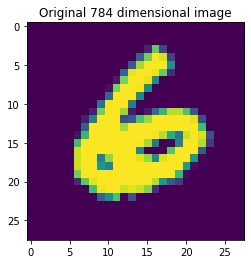

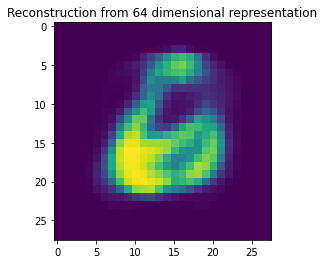

Epoch 2, Iteration 79 -- Loss: 0.040592
Epoch 2, Iteration 80 -- Loss: 0.041227
Epoch 2, Iteration 81 -- Loss: 0.041811
Epoch 2, Iteration 82 -- Loss: 0.040388
Epoch 2, Iteration 83 -- Loss: 0.039859
Epoch 2, Iteration 84 -- Loss: 0.040131
Epoch 2, Iteration 85 -- Loss: 0.038576
Epoch 2, Iteration 86 -- Loss: 0.038935
Epoch 2, Iteration 87 -- Loss: 0.038035
Epoch 2, Iteration 88 -- Loss: 0.037235


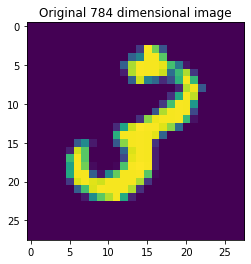

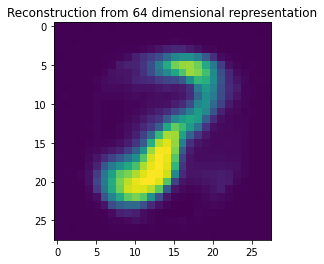

Epoch 2, Iteration 89 -- Loss: 0.037752
Epoch 2, Iteration 90 -- Loss: 0.036556
Epoch 2, Iteration 91 -- Loss: 0.035905
Epoch 2, Iteration 92 -- Loss: 0.036717
Epoch 2, Iteration 93 -- Loss: 0.040954
Epoch 2, Iteration 94 -- Loss: 0.038602
Epoch 2, Iteration 95 -- Loss: 0.036767
Epoch 2, Iteration 96 -- Loss: 0.037023
Epoch 2, Iteration 97 -- Loss: 0.036430
Epoch 2, Iteration 98 -- Loss: 0.037137


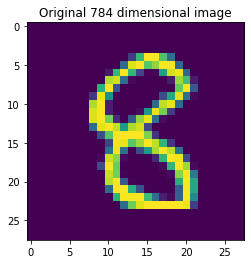

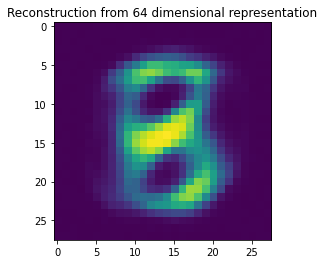

Epoch 2, Iteration 99 -- Loss: 0.035639
Epoch 2, Iteration 100 -- Loss: 0.033383
Epoch 2, Iteration 101 -- Loss: 0.034931
Epoch 2, Iteration 102 -- Loss: 0.035523
Epoch 2, Iteration 103 -- Loss: 0.035021
Epoch 2, Iteration 104 -- Loss: 0.035506
Epoch 2, Iteration 105 -- Loss: 0.036301
Epoch 2, Iteration 106 -- Loss: 0.036860
Epoch 2, Iteration 107 -- Loss: 0.035085
Epoch 2, Iteration 108 -- Loss: 0.035443


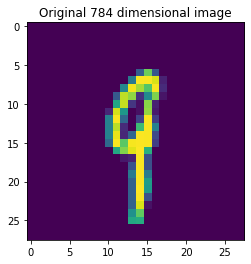

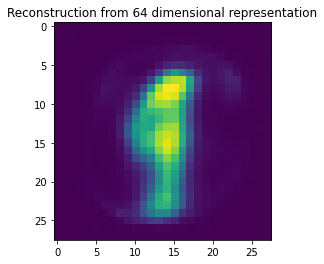

Epoch 2, Iteration 109 -- Loss: 0.032635
Epoch 2, Iteration 110 -- Loss: 0.033866
Epoch 2, Iteration 111 -- Loss: 0.033567
Epoch 2, Iteration 112 -- Loss: 0.033775
Epoch 2, Iteration 113 -- Loss: 0.033511
Epoch 2, Iteration 114 -- Loss: 0.032739
Epoch 2, Iteration 115 -- Loss: 0.031592
Epoch 3, Iteration 116 -- Loss: 0.031176


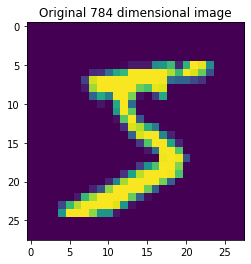

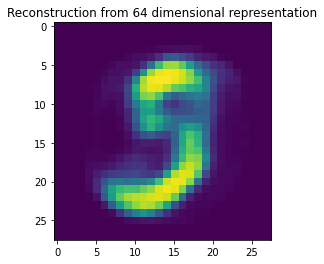

Epoch 3, Iteration 117 -- Loss: 0.034186
Epoch 3, Iteration 118 -- Loss: 0.034284
Epoch 3, Iteration 119 -- Loss: 0.033308
Epoch 3, Iteration 120 -- Loss: 0.033687
Epoch 3, Iteration 121 -- Loss: 0.033798
Epoch 3, Iteration 122 -- Loss: 0.033714
Epoch 3, Iteration 123 -- Loss: 0.033184
Epoch 3, Iteration 124 -- Loss: 0.032057
Epoch 3, Iteration 125 -- Loss: 0.032190
Epoch 3, Iteration 126 -- Loss: 0.030726


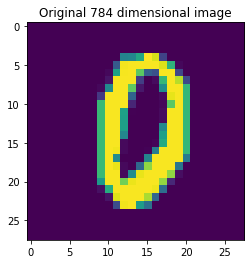

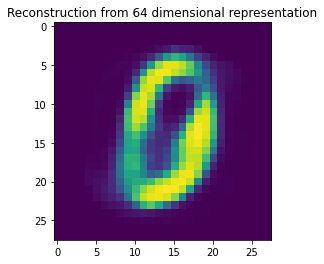

Epoch 3, Iteration 127 -- Loss: 0.029161
Epoch 3, Iteration 128 -- Loss: 0.033544
Epoch 3, Iteration 129 -- Loss: 0.033748
Epoch 3, Iteration 130 -- Loss: 0.033063
Epoch 3, Iteration 131 -- Loss: 0.031247
Epoch 3, Iteration 132 -- Loss: 0.031069
Epoch 3, Iteration 133 -- Loss: 0.029832
Epoch 3, Iteration 134 -- Loss: 0.031073
Epoch 3, Iteration 135 -- Loss: 0.031322
Epoch 3, Iteration 136 -- Loss: 0.031054


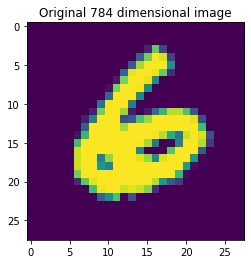

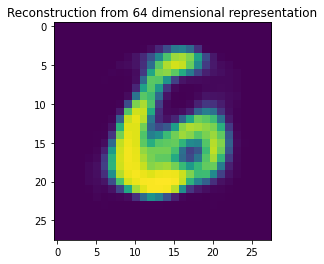

Epoch 3, Iteration 137 -- Loss: 0.032611
Epoch 3, Iteration 138 -- Loss: 0.032200
Epoch 3, Iteration 139 -- Loss: 0.032788
Epoch 3, Iteration 140 -- Loss: 0.031195
Epoch 3, Iteration 141 -- Loss: 0.031007
Epoch 3, Iteration 142 -- Loss: 0.031396
Epoch 3, Iteration 143 -- Loss: 0.030377
Epoch 3, Iteration 144 -- Loss: 0.031219
Epoch 3, Iteration 145 -- Loss: 0.030964
Epoch 3, Iteration 146 -- Loss: 0.030014


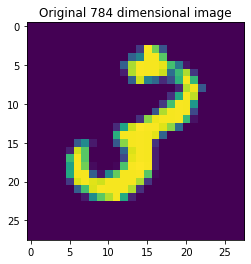

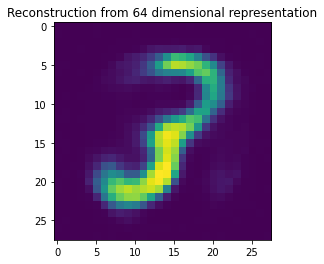

Epoch 3, Iteration 147 -- Loss: 0.030205
Epoch 3, Iteration 148 -- Loss: 0.028869
Epoch 3, Iteration 149 -- Loss: 0.028538
Epoch 3, Iteration 150 -- Loss: 0.029314
Epoch 3, Iteration 151 -- Loss: 0.033764
Epoch 3, Iteration 152 -- Loss: 0.031733
Epoch 3, Iteration 153 -- Loss: 0.029976
Epoch 3, Iteration 154 -- Loss: 0.029696
Epoch 3, Iteration 155 -- Loss: 0.028848
Epoch 3, Iteration 156 -- Loss: 0.030157


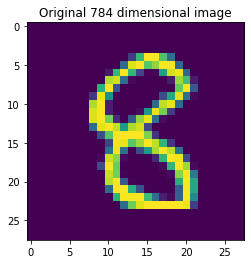

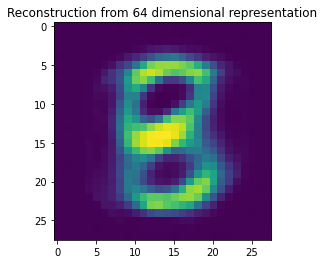

Epoch 3, Iteration 157 -- Loss: 0.029178
Epoch 3, Iteration 158 -- Loss: 0.028063
Epoch 3, Iteration 159 -- Loss: 0.028963
Epoch 3, Iteration 160 -- Loss: 0.029288
Epoch 3, Iteration 161 -- Loss: 0.028878
Epoch 3, Iteration 162 -- Loss: 0.029026
Epoch 3, Iteration 163 -- Loss: 0.029517
Epoch 3, Iteration 164 -- Loss: 0.030495
Epoch 3, Iteration 165 -- Loss: 0.028877
Epoch 3, Iteration 166 -- Loss: 0.029934


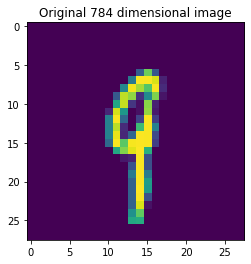

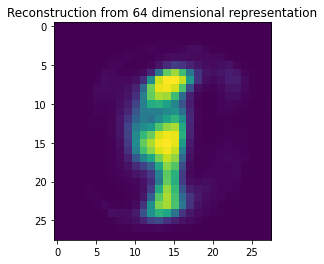

Epoch 3, Iteration 167 -- Loss: 0.027502
Epoch 3, Iteration 168 -- Loss: 0.028993
Epoch 3, Iteration 169 -- Loss: 0.028020
Epoch 3, Iteration 170 -- Loss: 0.027961
Epoch 3, Iteration 171 -- Loss: 0.027564
Epoch 3, Iteration 172 -- Loss: 0.026750
Epoch 3, Iteration 173 -- Loss: 0.025749
Epoch 4, Iteration 174 -- Loss: 0.025133


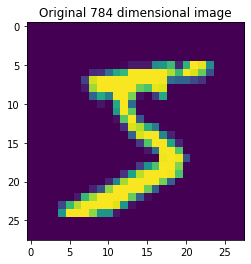

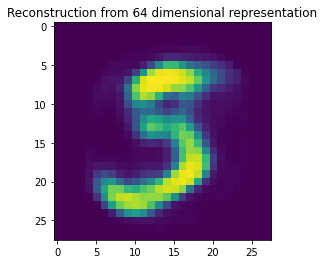

Epoch 4, Iteration 175 -- Loss: 0.027878
Epoch 4, Iteration 176 -- Loss: 0.026963
Epoch 4, Iteration 177 -- Loss: 0.025954
Epoch 4, Iteration 178 -- Loss: 0.026879
Epoch 4, Iteration 179 -- Loss: 0.026939
Epoch 4, Iteration 180 -- Loss: 0.027763
Epoch 4, Iteration 181 -- Loss: 0.027785
Epoch 4, Iteration 182 -- Loss: 0.027046
Epoch 4, Iteration 183 -- Loss: 0.027802
Epoch 4, Iteration 184 -- Loss: 0.027019


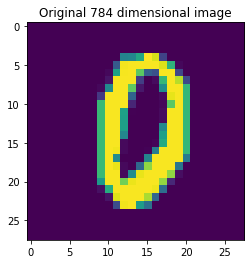

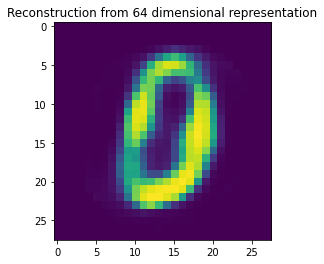

Epoch 4, Iteration 185 -- Loss: 0.026519
Epoch 4, Iteration 186 -- Loss: 0.029865
Epoch 4, Iteration 187 -- Loss: 0.029514
Epoch 4, Iteration 188 -- Loss: 0.028267
Epoch 4, Iteration 189 -- Loss: 0.026009
Epoch 4, Iteration 190 -- Loss: 0.025878
Epoch 4, Iteration 191 -- Loss: 0.024781
Epoch 4, Iteration 192 -- Loss: 0.025564
Epoch 4, Iteration 193 -- Loss: 0.025690
Epoch 4, Iteration 194 -- Loss: 0.025703


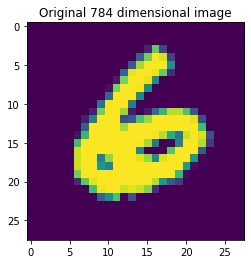

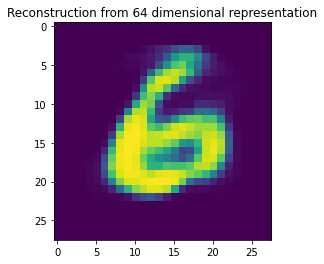

Epoch 4, Iteration 195 -- Loss: 0.027440
Epoch 4, Iteration 196 -- Loss: 0.026499
Epoch 4, Iteration 197 -- Loss: 0.027076
Epoch 4, Iteration 198 -- Loss: 0.026151
Epoch 4, Iteration 199 -- Loss: 0.025572
Epoch 4, Iteration 200 -- Loss: 0.026029
Epoch 4, Iteration 201 -- Loss: 0.025511
Epoch 4, Iteration 202 -- Loss: 0.026889
Epoch 4, Iteration 203 -- Loss: 0.026237
Epoch 4, Iteration 204 -- Loss: 0.025522


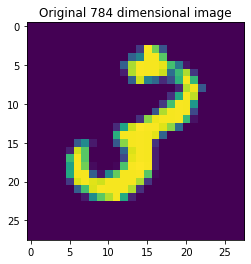

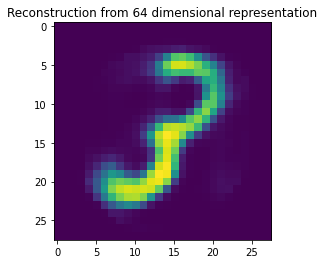

Epoch 4, Iteration 205 -- Loss: 0.025833
Epoch 4, Iteration 206 -- Loss: 0.025056
Epoch 4, Iteration 207 -- Loss: 0.024735
Epoch 4, Iteration 208 -- Loss: 0.025393
Epoch 4, Iteration 209 -- Loss: 0.029620
Epoch 4, Iteration 210 -- Loss: 0.027399
Epoch 4, Iteration 211 -- Loss: 0.024942
Epoch 4, Iteration 212 -- Loss: 0.024921
Epoch 4, Iteration 213 -- Loss: 0.024002
Epoch 4, Iteration 214 -- Loss: 0.025229


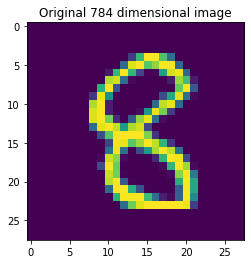

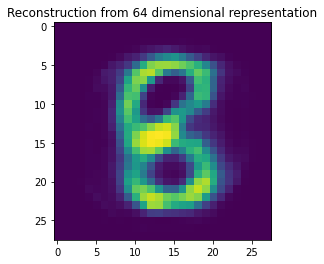

Epoch 4, Iteration 215 -- Loss: 0.024239
Epoch 4, Iteration 216 -- Loss: 0.023490
Epoch 4, Iteration 217 -- Loss: 0.024288
Epoch 4, Iteration 218 -- Loss: 0.025038
Epoch 4, Iteration 219 -- Loss: 0.024918
Epoch 4, Iteration 220 -- Loss: 0.025103
Epoch 4, Iteration 221 -- Loss: 0.025503
Epoch 4, Iteration 222 -- Loss: 0.025933
Epoch 4, Iteration 223 -- Loss: 0.024910
Epoch 4, Iteration 224 -- Loss: 0.025407


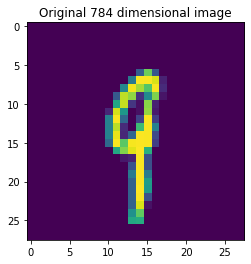

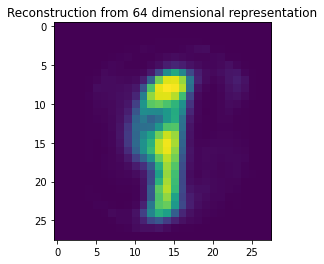

Epoch 4, Iteration 225 -- Loss: 0.023436
Epoch 4, Iteration 226 -- Loss: 0.024457
Epoch 4, Iteration 227 -- Loss: 0.024159
Epoch 4, Iteration 228 -- Loss: 0.024292
Epoch 4, Iteration 229 -- Loss: 0.023740
Epoch 4, Iteration 230 -- Loss: 0.023320
Epoch 4, Iteration 231 -- Loss: 0.022536
Epoch 5, Iteration 232 -- Loss: 0.021934


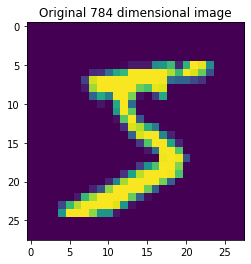

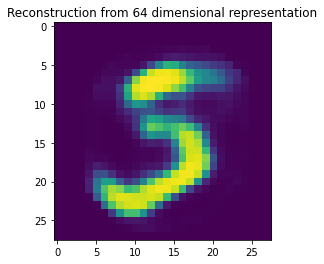

Epoch 5, Iteration 233 -- Loss: 0.024862
Epoch 5, Iteration 234 -- Loss: 0.024146
Epoch 5, Iteration 235 -- Loss: 0.023334
Epoch 5, Iteration 236 -- Loss: 0.023851
Epoch 5, Iteration 237 -- Loss: 0.024336
Epoch 5, Iteration 238 -- Loss: 0.025360
Epoch 5, Iteration 239 -- Loss: 0.025161
Epoch 5, Iteration 240 -- Loss: 0.023641
Epoch 5, Iteration 241 -- Loss: 0.024172
Epoch 5, Iteration 242 -- Loss: 0.022614


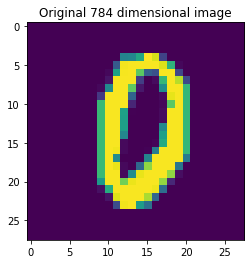

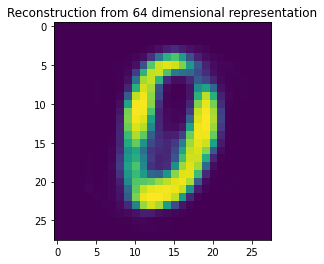

Epoch 5, Iteration 243 -- Loss: 0.022070
Epoch 5, Iteration 244 -- Loss: 0.024466
Epoch 5, Iteration 245 -- Loss: 0.024827
Epoch 5, Iteration 246 -- Loss: 0.024214
Epoch 5, Iteration 247 -- Loss: 0.022599
Epoch 5, Iteration 248 -- Loss: 0.022534
Epoch 5, Iteration 249 -- Loss: 0.021680
Epoch 5, Iteration 250 -- Loss: 0.022278
Epoch 5, Iteration 251 -- Loss: 0.022556
Epoch 5, Iteration 252 -- Loss: 0.022908


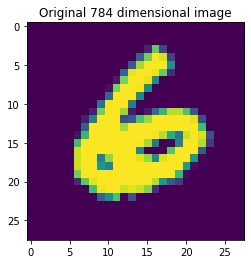

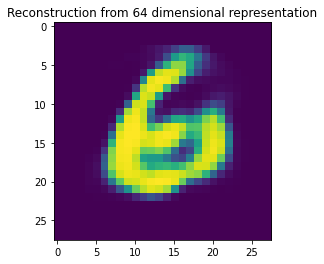

Epoch 5, Iteration 253 -- Loss: 0.024836
Epoch 5, Iteration 254 -- Loss: 0.023635
Epoch 5, Iteration 255 -- Loss: 0.024388
Epoch 5, Iteration 256 -- Loss: 0.023721
Epoch 5, Iteration 257 -- Loss: 0.023195
Epoch 5, Iteration 258 -- Loss: 0.023599
Epoch 5, Iteration 259 -- Loss: 0.022590
Epoch 5, Iteration 260 -- Loss: 0.023498
Epoch 5, Iteration 261 -- Loss: 0.023303
Epoch 5, Iteration 262 -- Loss: 0.022841


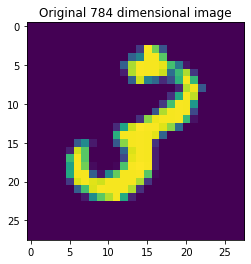

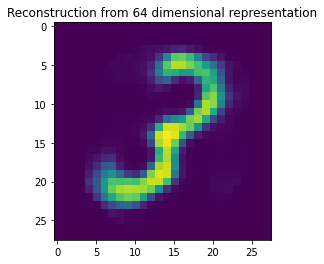

Epoch 5, Iteration 263 -- Loss: 0.022627
Epoch 5, Iteration 264 -- Loss: 0.021815
Epoch 5, Iteration 265 -- Loss: 0.021458
Epoch 5, Iteration 266 -- Loss: 0.022020
Epoch 5, Iteration 267 -- Loss: 0.026008
Epoch 5, Iteration 268 -- Loss: 0.024497
Epoch 5, Iteration 269 -- Loss: 0.022212
Epoch 5, Iteration 270 -- Loss: 0.022337
Epoch 5, Iteration 271 -- Loss: 0.021285
Epoch 5, Iteration 272 -- Loss: 0.022411


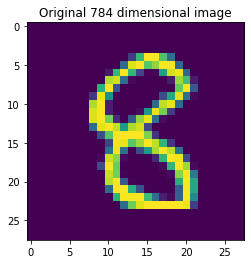

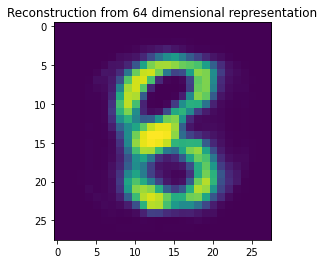

Epoch 5, Iteration 273 -- Loss: 0.021438
Epoch 5, Iteration 274 -- Loss: 0.020986
Epoch 5, Iteration 275 -- Loss: 0.021687
Epoch 5, Iteration 276 -- Loss: 0.022464
Epoch 5, Iteration 277 -- Loss: 0.022368
Epoch 5, Iteration 278 -- Loss: 0.022291
Epoch 5, Iteration 279 -- Loss: 0.022647
Epoch 5, Iteration 280 -- Loss: 0.023969
Epoch 5, Iteration 281 -- Loss: 0.023334
Epoch 5, Iteration 282 -- Loss: 0.024420


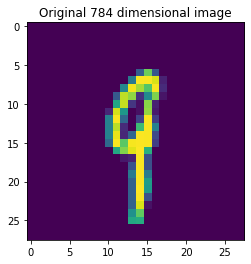

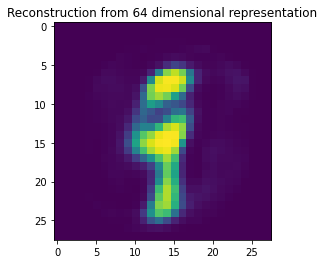

Epoch 5, Iteration 283 -- Loss: 0.021854
Epoch 5, Iteration 284 -- Loss: 0.023084
Epoch 5, Iteration 285 -- Loss: 0.022041
Epoch 5, Iteration 286 -- Loss: 0.021677
Epoch 5, Iteration 287 -- Loss: 0.020605
Epoch 5, Iteration 288 -- Loss: 0.020286
Epoch 5, Iteration 289 -- Loss: 0.019666
Epoch 6, Iteration 290 -- Loss: 0.018976


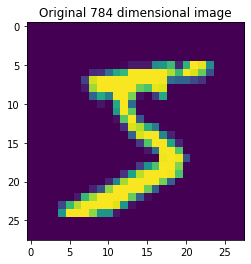

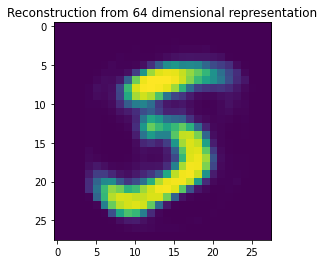

Epoch 6, Iteration 291 -- Loss: 0.021447
Epoch 6, Iteration 292 -- Loss: 0.020440
Epoch 6, Iteration 293 -- Loss: 0.019668
Epoch 6, Iteration 294 -- Loss: 0.020306
Epoch 6, Iteration 295 -- Loss: 0.020933
Epoch 6, Iteration 296 -- Loss: 0.022310
Epoch 6, Iteration 297 -- Loss: 0.022758
Epoch 6, Iteration 298 -- Loss: 0.021124
Epoch 6, Iteration 299 -- Loss: 0.021844
Epoch 6, Iteration 300 -- Loss: 0.020201


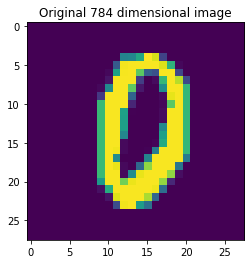

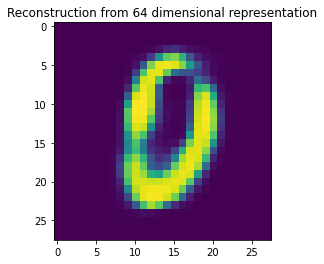

Epoch 6, Iteration 301 -- Loss: 0.020354
Epoch 6, Iteration 302 -- Loss: 0.022133
Epoch 6, Iteration 303 -- Loss: 0.022964
Epoch 6, Iteration 304 -- Loss: 0.022509
Epoch 6, Iteration 305 -- Loss: 0.020848
Epoch 6, Iteration 306 -- Loss: 0.020819
Epoch 6, Iteration 307 -- Loss: 0.020138
Epoch 6, Iteration 308 -- Loss: 0.020439
Epoch 6, Iteration 309 -- Loss: 0.020970
Epoch 6, Iteration 310 -- Loss: 0.021510


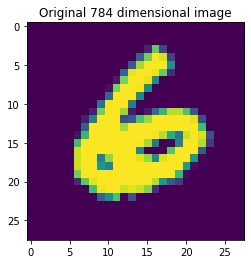

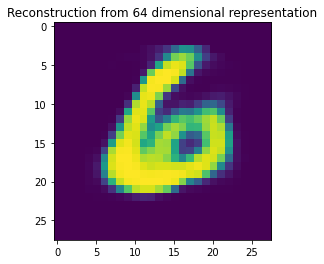

Epoch 6, Iteration 311 -- Loss: 0.023335
Epoch 6, Iteration 312 -- Loss: 0.021259
Epoch 6, Iteration 313 -- Loss: 0.021657
Epoch 6, Iteration 314 -- Loss: 0.020721
Epoch 6, Iteration 315 -- Loss: 0.020726
Epoch 6, Iteration 316 -- Loss: 0.020945
Epoch 6, Iteration 317 -- Loss: 0.020367
Epoch 6, Iteration 318 -- Loss: 0.020943
Epoch 6, Iteration 319 -- Loss: 0.021160
Epoch 6, Iteration 320 -- Loss: 0.020801


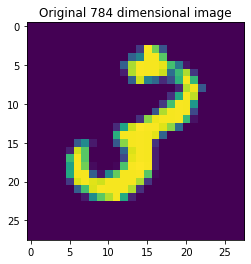

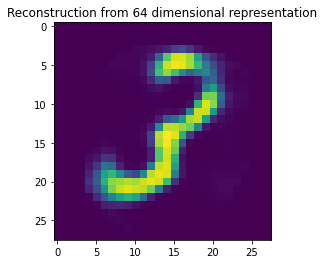

Epoch 6, Iteration 321 -- Loss: 0.020219
Epoch 6, Iteration 322 -- Loss: 0.019442
Epoch 6, Iteration 323 -- Loss: 0.019283
Epoch 6, Iteration 324 -- Loss: 0.019998
Epoch 6, Iteration 325 -- Loss: 0.024095
Epoch 6, Iteration 326 -- Loss: 0.022797
Epoch 6, Iteration 327 -- Loss: 0.020572
Epoch 6, Iteration 328 -- Loss: 0.020646
Epoch 6, Iteration 329 -- Loss: 0.019552
Epoch 6, Iteration 330 -- Loss: 0.020717


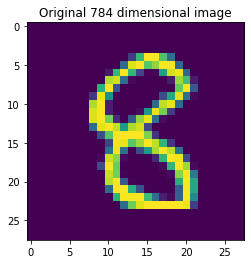

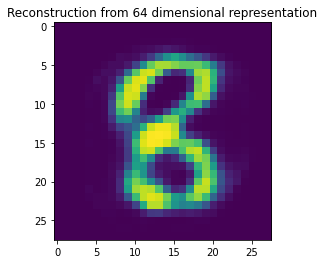

Epoch 6, Iteration 331 -- Loss: 0.019996
Epoch 6, Iteration 332 -- Loss: 0.019746
Epoch 6, Iteration 333 -- Loss: 0.020267
Epoch 6, Iteration 334 -- Loss: 0.020827
Epoch 6, Iteration 335 -- Loss: 0.020486
Epoch 6, Iteration 336 -- Loss: 0.020215
Epoch 6, Iteration 337 -- Loss: 0.020375
Epoch 6, Iteration 338 -- Loss: 0.020961
Epoch 6, Iteration 339 -- Loss: 0.020383
Epoch 6, Iteration 340 -- Loss: 0.020917


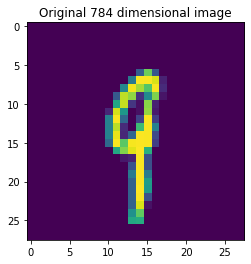

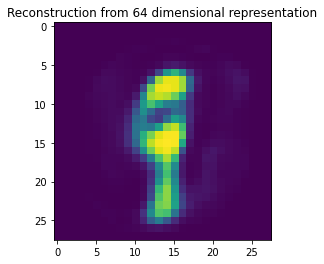

Epoch 6, Iteration 341 -- Loss: 0.019384
Epoch 6, Iteration 342 -- Loss: 0.020727
Epoch 6, Iteration 343 -- Loss: 0.021041
Epoch 6, Iteration 344 -- Loss: 0.021424
Epoch 6, Iteration 345 -- Loss: 0.019860
Epoch 6, Iteration 346 -- Loss: 0.019162
Epoch 6, Iteration 347 -- Loss: 0.018470
Epoch 7, Iteration 348 -- Loss: 0.017567


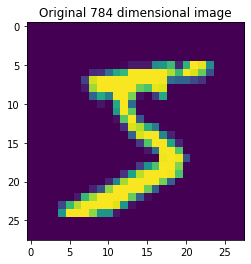

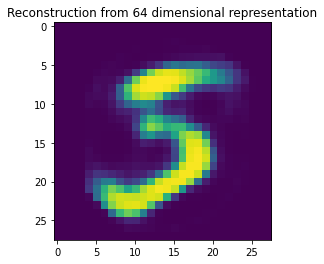

Epoch 7, Iteration 349 -- Loss: 0.020203
Epoch 7, Iteration 350 -- Loss: 0.019467
Epoch 7, Iteration 351 -- Loss: 0.018676
Epoch 7, Iteration 352 -- Loss: 0.018882
Epoch 7, Iteration 353 -- Loss: 0.019730
Epoch 7, Iteration 354 -- Loss: 0.021246
Epoch 7, Iteration 355 -- Loss: 0.021314
Epoch 7, Iteration 356 -- Loss: 0.019402
Epoch 7, Iteration 357 -- Loss: 0.019841
Epoch 7, Iteration 358 -- Loss: 0.018408


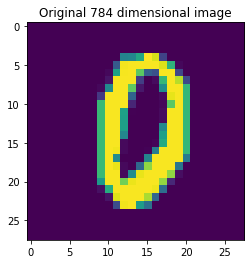

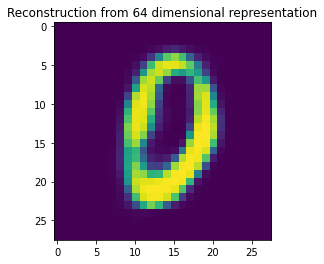

Epoch 7, Iteration 359 -- Loss: 0.018526
Epoch 7, Iteration 360 -- Loss: 0.020410
Epoch 7, Iteration 361 -- Loss: 0.021041
Epoch 7, Iteration 362 -- Loss: 0.020443
Epoch 7, Iteration 363 -- Loss: 0.019036
Epoch 7, Iteration 364 -- Loss: 0.019033
Epoch 7, Iteration 365 -- Loss: 0.018354
Epoch 7, Iteration 366 -- Loss: 0.018725
Epoch 7, Iteration 367 -- Loss: 0.019006
Epoch 7, Iteration 368 -- Loss: 0.019274


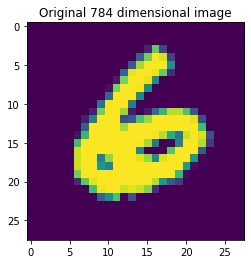

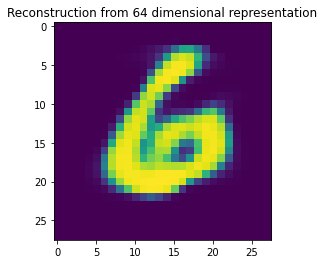

Epoch 7, Iteration 369 -- Loss: 0.020778
Epoch 7, Iteration 370 -- Loss: 0.018965
Epoch 7, Iteration 371 -- Loss: 0.019236
Epoch 7, Iteration 372 -- Loss: 0.019303
Epoch 7, Iteration 373 -- Loss: 0.019906
Epoch 7, Iteration 374 -- Loss: 0.020510
Epoch 7, Iteration 375 -- Loss: 0.019885
Epoch 7, Iteration 376 -- Loss: 0.020263
Epoch 7, Iteration 377 -- Loss: 0.020441
Epoch 7, Iteration 378 -- Loss: 0.019404


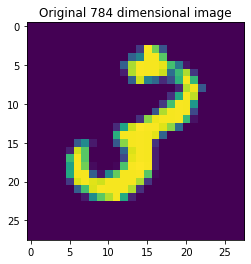

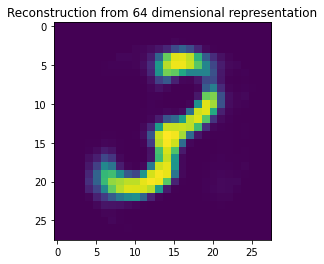

Epoch 7, Iteration 379 -- Loss: 0.018425
Epoch 7, Iteration 380 -- Loss: 0.017844
Epoch 7, Iteration 381 -- Loss: 0.017556
Epoch 7, Iteration 382 -- Loss: 0.018190
Epoch 7, Iteration 383 -- Loss: 0.022615
Epoch 7, Iteration 384 -- Loss: 0.021627
Epoch 7, Iteration 385 -- Loss: 0.019397
Epoch 7, Iteration 386 -- Loss: 0.019109
Epoch 7, Iteration 387 -- Loss: 0.017904
Epoch 7, Iteration 388 -- Loss: 0.019194


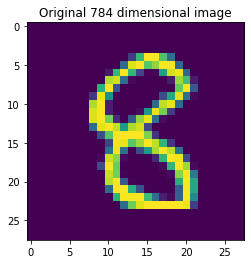

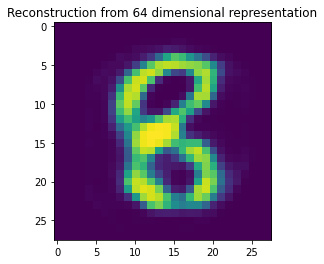

Epoch 7, Iteration 389 -- Loss: 0.018814
Epoch 7, Iteration 390 -- Loss: 0.018863
Epoch 7, Iteration 391 -- Loss: 0.018893
Epoch 7, Iteration 392 -- Loss: 0.019327
Epoch 7, Iteration 393 -- Loss: 0.019090
Epoch 7, Iteration 394 -- Loss: 0.018559
Epoch 7, Iteration 395 -- Loss: 0.018700
Epoch 7, Iteration 396 -- Loss: 0.019632
Epoch 7, Iteration 397 -- Loss: 0.019252
Epoch 7, Iteration 398 -- Loss: 0.019999


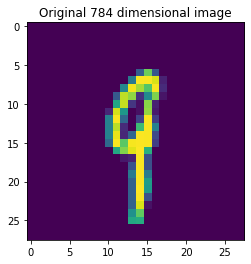

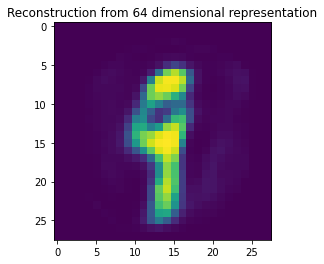

Epoch 7, Iteration 399 -- Loss: 0.018411
Epoch 7, Iteration 400 -- Loss: 0.019853
Epoch 7, Iteration 401 -- Loss: 0.019272
Epoch 7, Iteration 402 -- Loss: 0.019299
Epoch 7, Iteration 403 -- Loss: 0.017865
Epoch 7, Iteration 404 -- Loss: 0.017563
Epoch 7, Iteration 405 -- Loss: 0.017028
Epoch 8, Iteration 406 -- Loss: 0.016433


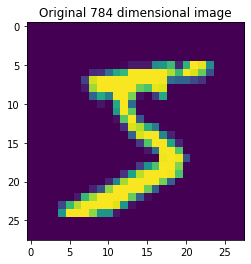

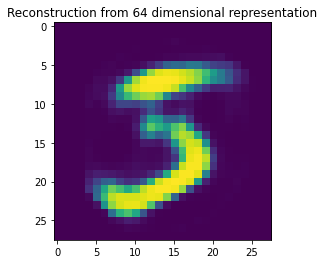

Epoch 8, Iteration 407 -- Loss: 0.018743
Epoch 8, Iteration 408 -- Loss: 0.017904
Epoch 8, Iteration 409 -- Loss: 0.017015
Epoch 8, Iteration 410 -- Loss: 0.017559
Epoch 8, Iteration 411 -- Loss: 0.017964
Epoch 8, Iteration 412 -- Loss: 0.019066
Epoch 8, Iteration 413 -- Loss: 0.018921
Epoch 8, Iteration 414 -- Loss: 0.018016
Epoch 8, Iteration 415 -- Loss: 0.018603
Epoch 8, Iteration 416 -- Loss: 0.017724


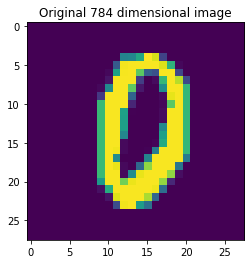

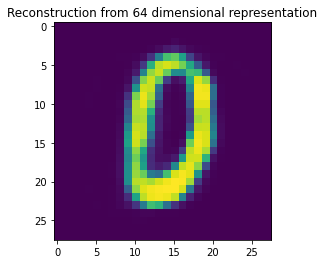

Epoch 8, Iteration 417 -- Loss: 0.018566
Epoch 8, Iteration 418 -- Loss: 0.020744
Epoch 8, Iteration 419 -- Loss: 0.022136
Epoch 8, Iteration 420 -- Loss: 0.020498
Epoch 8, Iteration 421 -- Loss: 0.017756
Epoch 8, Iteration 422 -- Loss: 0.017306
Epoch 8, Iteration 423 -- Loss: 0.016801
Epoch 8, Iteration 424 -- Loss: 0.017273
Epoch 8, Iteration 425 -- Loss: 0.017260
Epoch 8, Iteration 426 -- Loss: 0.017146


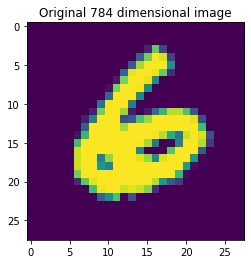

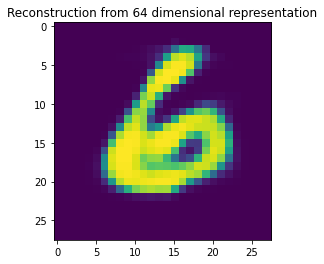

Epoch 8, Iteration 427 -- Loss: 0.018721
Epoch 8, Iteration 428 -- Loss: 0.017639
Epoch 8, Iteration 429 -- Loss: 0.018783
Epoch 8, Iteration 430 -- Loss: 0.019693
Epoch 8, Iteration 431 -- Loss: 0.020675
Epoch 8, Iteration 432 -- Loss: 0.020505
Epoch 8, Iteration 433 -- Loss: 0.019221
Epoch 8, Iteration 434 -- Loss: 0.019143
Epoch 8, Iteration 435 -- Loss: 0.019378
Epoch 8, Iteration 436 -- Loss: 0.018280


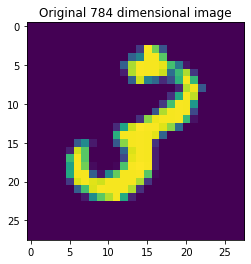

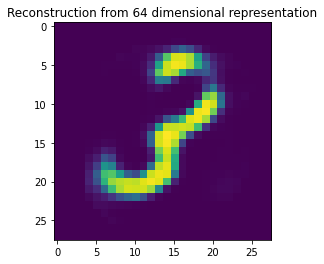

Epoch 8, Iteration 437 -- Loss: 0.017150
Epoch 8, Iteration 438 -- Loss: 0.016552
Epoch 8, Iteration 439 -- Loss: 0.016300
Epoch 8, Iteration 440 -- Loss: 0.016844
Epoch 8, Iteration 441 -- Loss: 0.020949
Epoch 8, Iteration 442 -- Loss: 0.020191
Epoch 8, Iteration 443 -- Loss: 0.017996
Epoch 8, Iteration 444 -- Loss: 0.018037
Epoch 8, Iteration 445 -- Loss: 0.016859
Epoch 8, Iteration 446 -- Loss: 0.017949


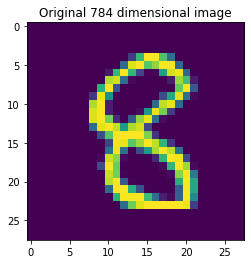

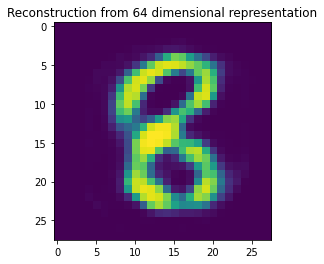

Epoch 8, Iteration 447 -- Loss: 0.017359
Epoch 8, Iteration 448 -- Loss: 0.017387
Epoch 8, Iteration 449 -- Loss: 0.017376
Epoch 8, Iteration 450 -- Loss: 0.018160
Epoch 8, Iteration 451 -- Loss: 0.017927
Epoch 8, Iteration 452 -- Loss: 0.017570
Epoch 8, Iteration 453 -- Loss: 0.017615
Epoch 8, Iteration 454 -- Loss: 0.018415
Epoch 8, Iteration 455 -- Loss: 0.018038
Epoch 8, Iteration 456 -- Loss: 0.019001


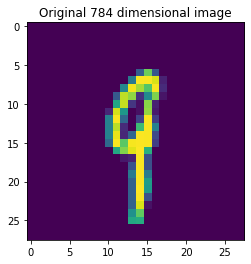

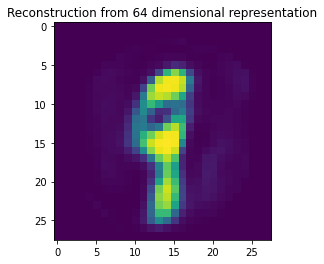

Epoch 8, Iteration 457 -- Loss: 0.017687
Epoch 8, Iteration 458 -- Loss: 0.019257
Epoch 8, Iteration 459 -- Loss: 0.019110
Epoch 8, Iteration 460 -- Loss: 0.019104
Epoch 8, Iteration 461 -- Loss: 0.017329
Epoch 8, Iteration 462 -- Loss: 0.016722
Epoch 8, Iteration 463 -- Loss: 0.016068
Epoch 9, Iteration 464 -- Loss: 0.015264


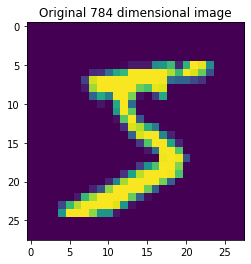

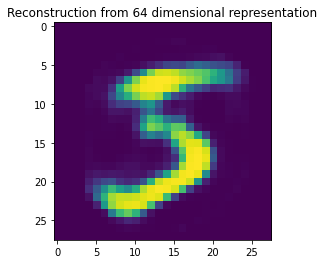

Epoch 9, Iteration 465 -- Loss: 0.017567
Epoch 9, Iteration 466 -- Loss: 0.016827
Epoch 9, Iteration 467 -- Loss: 0.016113
Epoch 9, Iteration 468 -- Loss: 0.016424
Epoch 9, Iteration 469 -- Loss: 0.016948
Epoch 9, Iteration 470 -- Loss: 0.018135
Epoch 9, Iteration 471 -- Loss: 0.018359
Epoch 9, Iteration 472 -- Loss: 0.017007
Epoch 9, Iteration 473 -- Loss: 0.017647
Epoch 9, Iteration 474 -- Loss: 0.016712


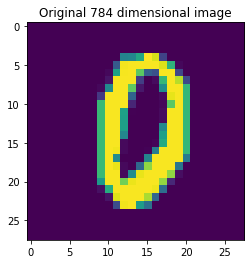

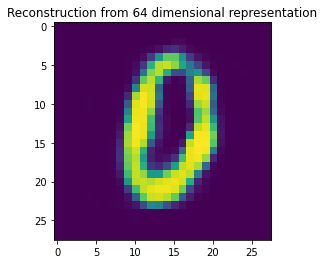

Epoch 9, Iteration 475 -- Loss: 0.017563
Epoch 9, Iteration 476 -- Loss: 0.018628
Epoch 9, Iteration 477 -- Loss: 0.019601
Epoch 9, Iteration 478 -- Loss: 0.018743
Epoch 9, Iteration 479 -- Loss: 0.017061
Epoch 9, Iteration 480 -- Loss: 0.016617
Epoch 9, Iteration 481 -- Loss: 0.015978
Epoch 9, Iteration 482 -- Loss: 0.016144
Epoch 9, Iteration 483 -- Loss: 0.016351
Epoch 9, Iteration 484 -- Loss: 0.016519


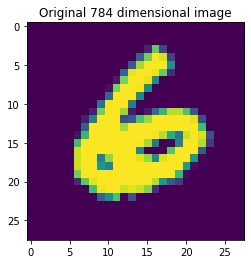

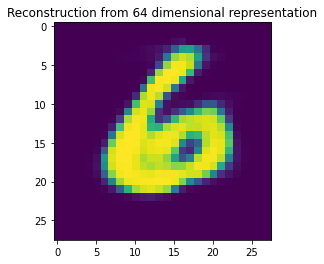

Epoch 9, Iteration 485 -- Loss: 0.018119
Epoch 9, Iteration 486 -- Loss: 0.016492
Epoch 9, Iteration 487 -- Loss: 0.016533
Epoch 9, Iteration 488 -- Loss: 0.016447
Epoch 9, Iteration 489 -- Loss: 0.016542
Epoch 9, Iteration 490 -- Loss: 0.017091
Epoch 9, Iteration 491 -- Loss: 0.016785
Epoch 9, Iteration 492 -- Loss: 0.017543
Epoch 9, Iteration 493 -- Loss: 0.017798
Epoch 9, Iteration 494 -- Loss: 0.017244


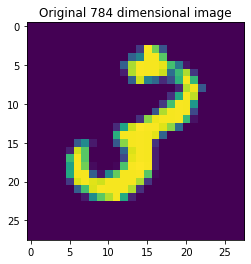

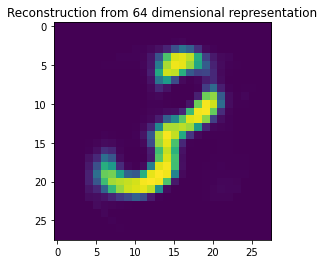

Epoch 9, Iteration 495 -- Loss: 0.016457
Epoch 9, Iteration 496 -- Loss: 0.016360
Epoch 9, Iteration 497 -- Loss: 0.016535
Epoch 9, Iteration 498 -- Loss: 0.017529
Epoch 9, Iteration 499 -- Loss: 0.022120
Epoch 9, Iteration 500 -- Loss: 0.021349
Epoch 9, Iteration 501 -- Loss: 0.018516
Epoch 9, Iteration 502 -- Loss: 0.017529
Epoch 9, Iteration 503 -- Loss: 0.016142
Epoch 9, Iteration 504 -- Loss: 0.017097


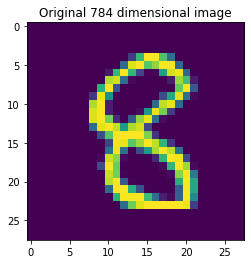

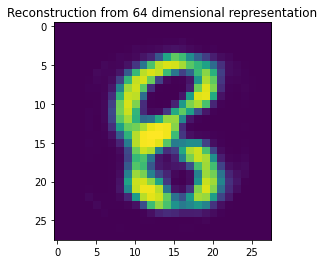

Epoch 9, Iteration 505 -- Loss: 0.016563
Epoch 9, Iteration 506 -- Loss: 0.016461
Epoch 9, Iteration 507 -- Loss: 0.016280
Epoch 9, Iteration 508 -- Loss: 0.017009
Epoch 9, Iteration 509 -- Loss: 0.016740
Epoch 9, Iteration 510 -- Loss: 0.016348
Epoch 9, Iteration 511 -- Loss: 0.016393
Epoch 9, Iteration 512 -- Loss: 0.017188
Epoch 9, Iteration 513 -- Loss: 0.016941
Epoch 9, Iteration 514 -- Loss: 0.017679


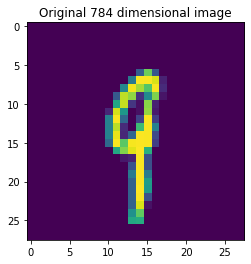

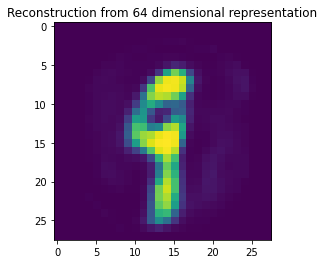

Epoch 9, Iteration 515 -- Loss: 0.016479
Epoch 9, Iteration 516 -- Loss: 0.018109
Epoch 9, Iteration 517 -- Loss: 0.018150
Epoch 9, Iteration 518 -- Loss: 0.018486
Epoch 9, Iteration 519 -- Loss: 0.016273
Epoch 9, Iteration 520 -- Loss: 0.015800
Epoch 9, Iteration 521 -- Loss: 0.015144
Epoch 10, Iteration 522 -- Loss: 0.014395


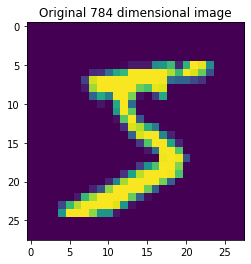

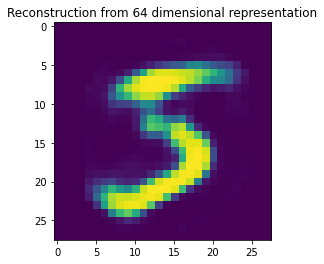

Epoch 10, Iteration 523 -- Loss: 0.016541
Epoch 10, Iteration 524 -- Loss: 0.015876
Epoch 10, Iteration 525 -- Loss: 0.015008
Epoch 10, Iteration 526 -- Loss: 0.015392
Epoch 10, Iteration 527 -- Loss: 0.015729
Epoch 10, Iteration 528 -- Loss: 0.016739
Epoch 10, Iteration 529 -- Loss: 0.016715
Epoch 10, Iteration 530 -- Loss: 0.015696
Epoch 10, Iteration 531 -- Loss: 0.016191
Epoch 10, Iteration 532 -- Loss: 0.015388


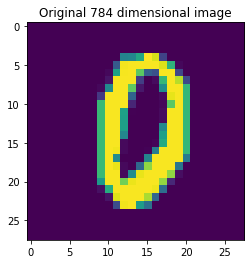

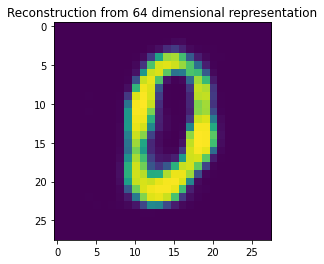

Epoch 10, Iteration 533 -- Loss: 0.016467
Epoch 10, Iteration 534 -- Loss: 0.018061
Epoch 10, Iteration 535 -- Loss: 0.019678
Epoch 10, Iteration 536 -- Loss: 0.018061
Epoch 10, Iteration 537 -- Loss: 0.016183
Epoch 10, Iteration 538 -- Loss: 0.015775
Epoch 10, Iteration 539 -- Loss: 0.015205
Epoch 10, Iteration 540 -- Loss: 0.015308
Epoch 10, Iteration 541 -- Loss: 0.015330
Epoch 10, Iteration 542 -- Loss: 0.015274


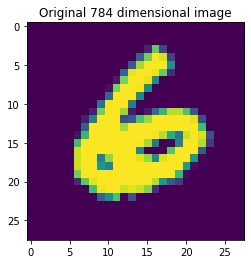

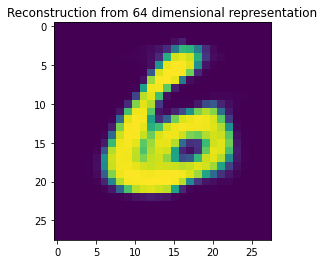

Epoch 10, Iteration 543 -- Loss: 0.016942
Epoch 10, Iteration 544 -- Loss: 0.015678
Epoch 10, Iteration 545 -- Loss: 0.016063
Epoch 10, Iteration 546 -- Loss: 0.016266
Epoch 10, Iteration 547 -- Loss: 0.016979
Epoch 10, Iteration 548 -- Loss: 0.017198
Epoch 10, Iteration 549 -- Loss: 0.016759
Epoch 10, Iteration 550 -- Loss: 0.017235
Epoch 10, Iteration 551 -- Loss: 0.017632
Epoch 10, Iteration 552 -- Loss: 0.016618


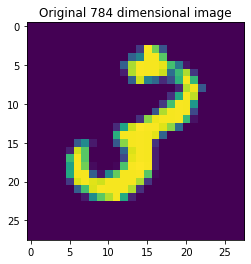

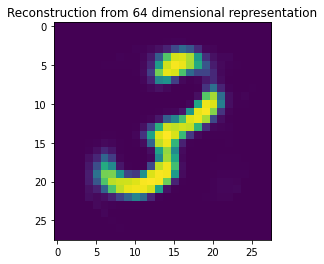

Epoch 10, Iteration 553 -- Loss: 0.015259
Epoch 10, Iteration 554 -- Loss: 0.014881
Epoch 10, Iteration 555 -- Loss: 0.014718
Epoch 10, Iteration 556 -- Loss: 0.015347
Epoch 10, Iteration 557 -- Loss: 0.019402
Epoch 10, Iteration 558 -- Loss: 0.019026
Epoch 10, Iteration 559 -- Loss: 0.017422
Epoch 10, Iteration 560 -- Loss: 0.016778
Epoch 10, Iteration 561 -- Loss: 0.015515
Epoch 10, Iteration 562 -- Loss: 0.016450


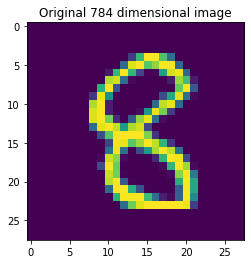

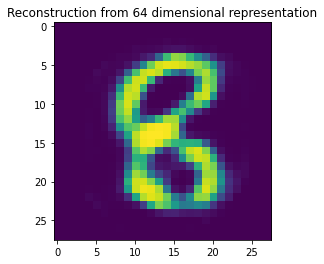

Epoch 10, Iteration 563 -- Loss: 0.016079
Epoch 10, Iteration 564 -- Loss: 0.016168
Epoch 10, Iteration 565 -- Loss: 0.015830
Epoch 10, Iteration 566 -- Loss: 0.016485
Epoch 10, Iteration 567 -- Loss: 0.016159
Epoch 10, Iteration 568 -- Loss: 0.015703
Epoch 10, Iteration 569 -- Loss: 0.015812
Epoch 10, Iteration 570 -- Loss: 0.016985
Epoch 10, Iteration 571 -- Loss: 0.016931
Epoch 10, Iteration 572 -- Loss: 0.018032


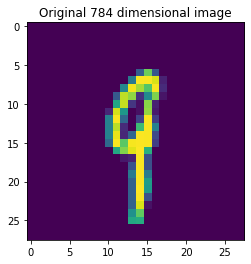

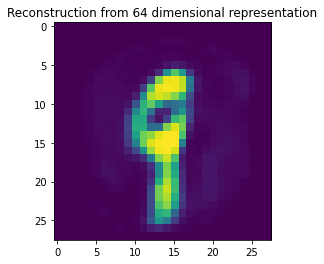

Epoch 10, Iteration 573 -- Loss: 0.016453
Epoch 10, Iteration 574 -- Loss: 0.017733
Epoch 10, Iteration 575 -- Loss: 0.017272
Epoch 10, Iteration 576 -- Loss: 0.017169
Epoch 10, Iteration 577 -- Loss: 0.015362
Epoch 10, Iteration 578 -- Loss: 0.014930
Epoch 10, Iteration 579 -- Loss: 0.014298
Epoch 11, Iteration 580 -- Loss: 0.013637


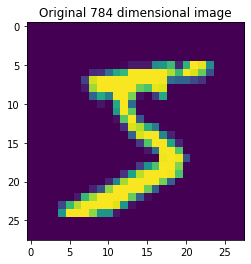

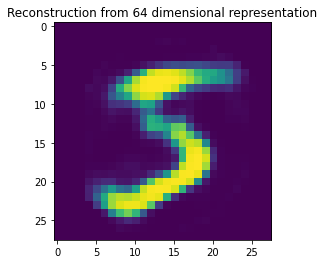

Epoch 11, Iteration 581 -- Loss: 0.015628
Epoch 11, Iteration 582 -- Loss: 0.014844
Epoch 11, Iteration 583 -- Loss: 0.014158
Epoch 11, Iteration 584 -- Loss: 0.014649
Epoch 11, Iteration 585 -- Loss: 0.014943
Epoch 11, Iteration 586 -- Loss: 0.016004
Epoch 11, Iteration 587 -- Loss: 0.016110
Epoch 11, Iteration 588 -- Loss: 0.015273
Epoch 11, Iteration 589 -- Loss: 0.015758
Epoch 11, Iteration 590 -- Loss: 0.015078


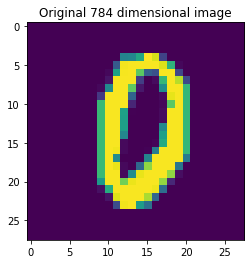

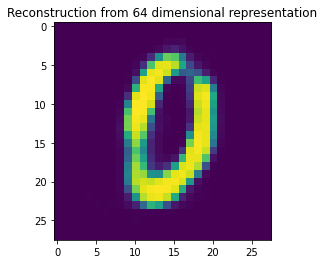

Epoch 11, Iteration 591 -- Loss: 0.016347
Epoch 11, Iteration 592 -- Loss: 0.017788
Epoch 11, Iteration 593 -- Loss: 0.018628
Epoch 11, Iteration 594 -- Loss: 0.016937
Epoch 11, Iteration 595 -- Loss: 0.015062
Epoch 11, Iteration 596 -- Loss: 0.014624
Epoch 11, Iteration 597 -- Loss: 0.014170
Epoch 11, Iteration 598 -- Loss: 0.014343
Epoch 11, Iteration 599 -- Loss: 0.014472
Epoch 11, Iteration 600 -- Loss: 0.014531


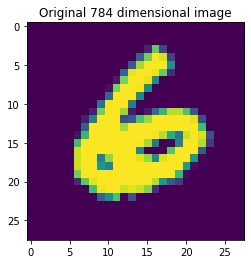

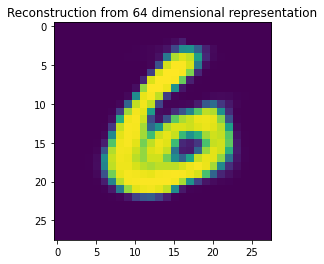

Epoch 11, Iteration 601 -- Loss: 0.015979
Epoch 11, Iteration 602 -- Loss: 0.014771
Epoch 11, Iteration 603 -- Loss: 0.014728
Epoch 11, Iteration 604 -- Loss: 0.014833
Epoch 11, Iteration 605 -- Loss: 0.015294
Epoch 11, Iteration 606 -- Loss: 0.015805
Epoch 11, Iteration 607 -- Loss: 0.015790
Epoch 11, Iteration 608 -- Loss: 0.016309
Epoch 11, Iteration 609 -- Loss: 0.016613
Epoch 11, Iteration 610 -- Loss: 0.015647


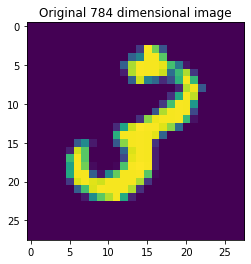

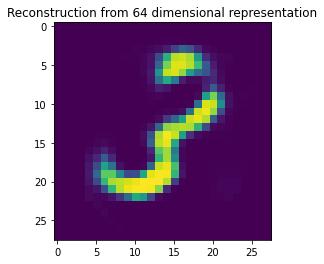

Epoch 11, Iteration 611 -- Loss: 0.014754
Epoch 11, Iteration 612 -- Loss: 0.014772
Epoch 11, Iteration 613 -- Loss: 0.014780
Epoch 11, Iteration 614 -- Loss: 0.015826
Epoch 11, Iteration 615 -- Loss: 0.019593
Epoch 11, Iteration 616 -- Loss: 0.019523
Epoch 11, Iteration 617 -- Loss: 0.017084
Epoch 11, Iteration 618 -- Loss: 0.016046
Epoch 11, Iteration 619 -- Loss: 0.014668
Epoch 11, Iteration 620 -- Loss: 0.015464


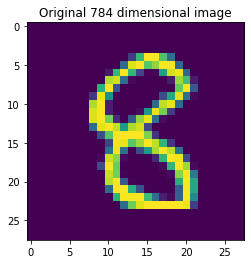

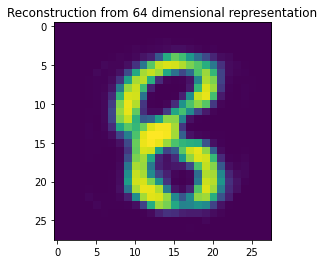

Epoch 11, Iteration 621 -- Loss: 0.015157
Epoch 11, Iteration 622 -- Loss: 0.015130
Epoch 11, Iteration 623 -- Loss: 0.014771
Epoch 11, Iteration 624 -- Loss: 0.015458
Epoch 11, Iteration 625 -- Loss: 0.015139
Epoch 11, Iteration 626 -- Loss: 0.014811
Epoch 11, Iteration 627 -- Loss: 0.014926
Epoch 11, Iteration 628 -- Loss: 0.016070
Epoch 11, Iteration 629 -- Loss: 0.016207
Epoch 11, Iteration 630 -- Loss: 0.017214


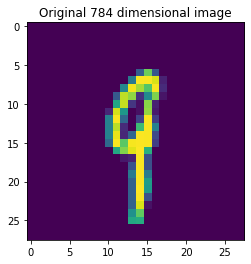

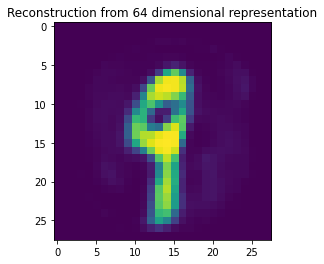

Epoch 11, Iteration 631 -- Loss: 0.015730
Epoch 11, Iteration 632 -- Loss: 0.016772
Epoch 11, Iteration 633 -- Loss: 0.016355
Epoch 11, Iteration 634 -- Loss: 0.016342
Epoch 11, Iteration 635 -- Loss: 0.014549
Epoch 11, Iteration 636 -- Loss: 0.014158
Epoch 11, Iteration 637 -- Loss: 0.013505
Epoch 12, Iteration 638 -- Loss: 0.012836


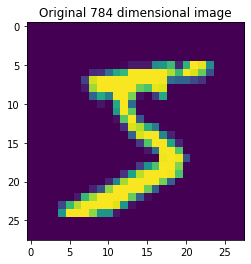

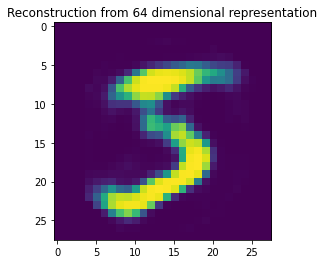

Epoch 12, Iteration 639 -- Loss: 0.014676
Epoch 12, Iteration 640 -- Loss: 0.013958
Epoch 12, Iteration 641 -- Loss: 0.013285
Epoch 12, Iteration 642 -- Loss: 0.013705
Epoch 12, Iteration 643 -- Loss: 0.013935
Epoch 12, Iteration 644 -- Loss: 0.014978
Epoch 12, Iteration 645 -- Loss: 0.015045
Epoch 12, Iteration 646 -- Loss: 0.014107
Epoch 12, Iteration 647 -- Loss: 0.014489
Epoch 12, Iteration 648 -- Loss: 0.013677


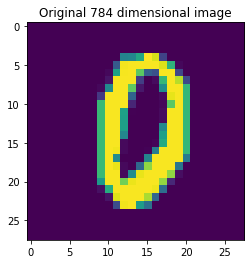

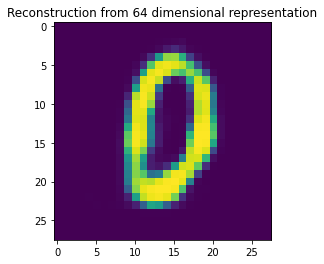

Epoch 12, Iteration 649 -- Loss: 0.014781
Epoch 12, Iteration 650 -- Loss: 0.016623
Epoch 12, Iteration 651 -- Loss: 0.018407
Epoch 12, Iteration 652 -- Loss: 0.017272
Epoch 12, Iteration 653 -- Loss: 0.014951
Epoch 12, Iteration 654 -- Loss: 0.014459
Epoch 12, Iteration 655 -- Loss: 0.013894
Epoch 12, Iteration 656 -- Loss: 0.013925
Epoch 12, Iteration 657 -- Loss: 0.013970
Epoch 12, Iteration 658 -- Loss: 0.014014


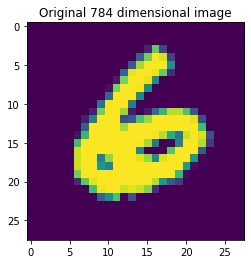

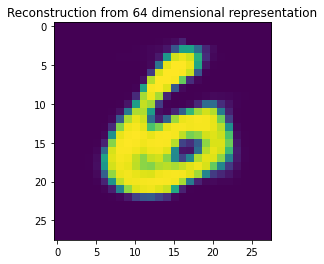

Epoch 12, Iteration 659 -- Loss: 0.015398
Epoch 12, Iteration 660 -- Loss: 0.014312
Epoch 12, Iteration 661 -- Loss: 0.014113
Epoch 12, Iteration 662 -- Loss: 0.013989
Epoch 12, Iteration 663 -- Loss: 0.014099
Epoch 12, Iteration 664 -- Loss: 0.014452
Epoch 12, Iteration 665 -- Loss: 0.014322
Epoch 12, Iteration 666 -- Loss: 0.015063
Epoch 12, Iteration 667 -- Loss: 0.015078
Epoch 12, Iteration 668 -- Loss: 0.014860


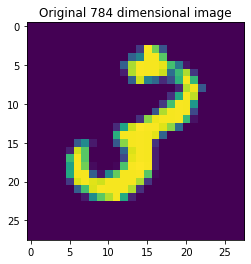

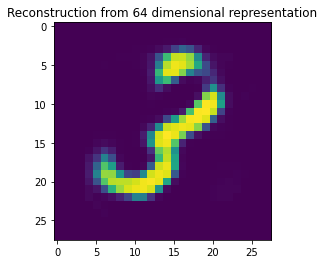

Epoch 12, Iteration 669 -- Loss: 0.014061
Epoch 12, Iteration 670 -- Loss: 0.014153
Epoch 12, Iteration 671 -- Loss: 0.014182
Epoch 12, Iteration 672 -- Loss: 0.015293
Epoch 12, Iteration 673 -- Loss: 0.018935
Epoch 12, Iteration 674 -- Loss: 0.019469
Epoch 12, Iteration 675 -- Loss: 0.016688
Epoch 12, Iteration 676 -- Loss: 0.015824
Epoch 12, Iteration 677 -- Loss: 0.014123
Epoch 12, Iteration 678 -- Loss: 0.014974


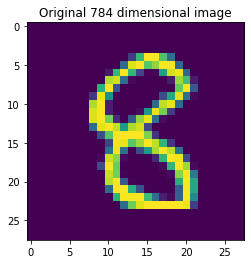

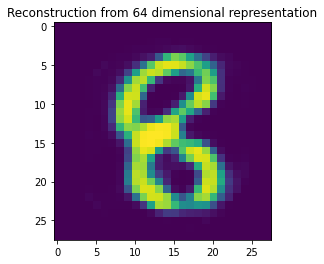

Epoch 12, Iteration 679 -- Loss: 0.014635
Epoch 12, Iteration 680 -- Loss: 0.014823
Epoch 12, Iteration 681 -- Loss: 0.014410
Epoch 12, Iteration 682 -- Loss: 0.015239
Epoch 12, Iteration 683 -- Loss: 0.014803
Epoch 12, Iteration 684 -- Loss: 0.014567
Epoch 12, Iteration 685 -- Loss: 0.014558
Epoch 12, Iteration 686 -- Loss: 0.015777
Epoch 12, Iteration 687 -- Loss: 0.015571
Epoch 12, Iteration 688 -- Loss: 0.016317


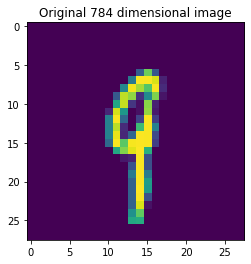

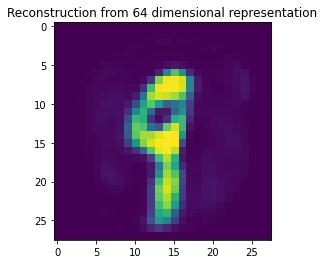

Epoch 12, Iteration 689 -- Loss: 0.014895
Epoch 12, Iteration 690 -- Loss: 0.015994
Epoch 12, Iteration 691 -- Loss: 0.015618
Epoch 12, Iteration 692 -- Loss: 0.015598
Epoch 12, Iteration 693 -- Loss: 0.014196
Epoch 12, Iteration 694 -- Loss: 0.013817
Epoch 12, Iteration 695 -- Loss: 0.013203
Epoch 13, Iteration 696 -- Loss: 0.012695


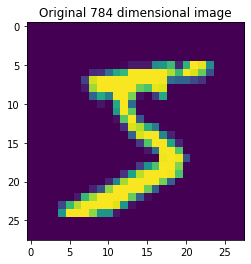

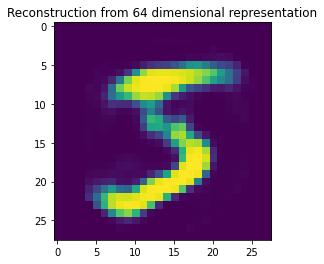

Epoch 13, Iteration 697 -- Loss: 0.014438
Epoch 13, Iteration 698 -- Loss: 0.014022
Epoch 13, Iteration 699 -- Loss: 0.013335
Epoch 13, Iteration 700 -- Loss: 0.013692
Epoch 13, Iteration 701 -- Loss: 0.014135
Epoch 13, Iteration 702 -- Loss: 0.015494
Epoch 13, Iteration 703 -- Loss: 0.015439
Epoch 13, Iteration 704 -- Loss: 0.014262
Epoch 13, Iteration 705 -- Loss: 0.014979
Epoch 13, Iteration 706 -- Loss: 0.013978


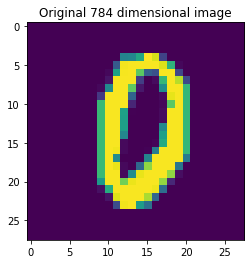

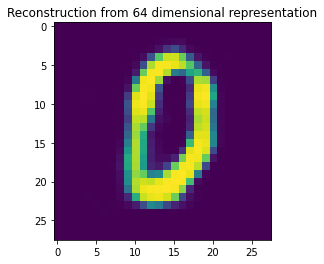

Epoch 13, Iteration 707 -- Loss: 0.015116
Epoch 13, Iteration 708 -- Loss: 0.015756
Epoch 13, Iteration 709 -- Loss: 0.016781
Epoch 13, Iteration 710 -- Loss: 0.015204
Epoch 13, Iteration 711 -- Loss: 0.013786
Epoch 13, Iteration 712 -- Loss: 0.013297
Epoch 13, Iteration 713 -- Loss: 0.012980
Epoch 13, Iteration 714 -- Loss: 0.013033
Epoch 13, Iteration 715 -- Loss: 0.013120
Epoch 13, Iteration 716 -- Loss: 0.013102


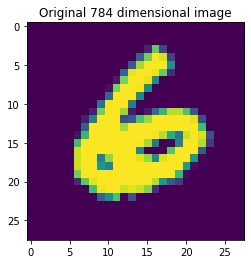

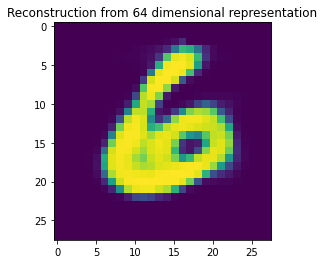

Epoch 13, Iteration 717 -- Loss: 0.014585
Epoch 13, Iteration 718 -- Loss: 0.013429
Epoch 13, Iteration 719 -- Loss: 0.013626
Epoch 13, Iteration 720 -- Loss: 0.013566
Epoch 13, Iteration 721 -- Loss: 0.014094
Epoch 13, Iteration 722 -- Loss: 0.014385
Epoch 13, Iteration 723 -- Loss: 0.014280
Epoch 13, Iteration 724 -- Loss: 0.015015
Epoch 13, Iteration 725 -- Loss: 0.015459
Epoch 13, Iteration 726 -- Loss: 0.014614


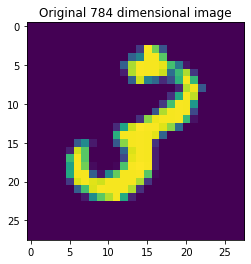

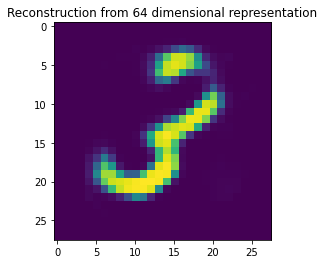

Epoch 13, Iteration 727 -- Loss: 0.013399
Epoch 13, Iteration 728 -- Loss: 0.013258
Epoch 13, Iteration 729 -- Loss: 0.013125
Epoch 13, Iteration 730 -- Loss: 0.013798
Epoch 13, Iteration 731 -- Loss: 0.017602
Epoch 13, Iteration 732 -- Loss: 0.018301
Epoch 13, Iteration 733 -- Loss: 0.017010
Epoch 13, Iteration 734 -- Loss: 0.015642
Epoch 13, Iteration 735 -- Loss: 0.013955
Epoch 13, Iteration 736 -- Loss: 0.014680


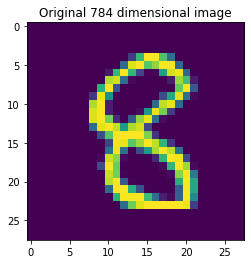

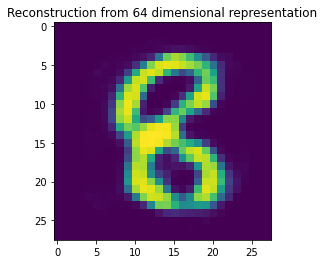

Epoch 13, Iteration 737 -- Loss: 0.014371
Epoch 13, Iteration 738 -- Loss: 0.014684
Epoch 13, Iteration 739 -- Loss: 0.014008
Epoch 13, Iteration 740 -- Loss: 0.014775
Epoch 13, Iteration 741 -- Loss: 0.014233
Epoch 13, Iteration 742 -- Loss: 0.013996
Epoch 13, Iteration 743 -- Loss: 0.013986
Epoch 13, Iteration 744 -- Loss: 0.015098
Epoch 13, Iteration 745 -- Loss: 0.014800
Epoch 13, Iteration 746 -- Loss: 0.015612


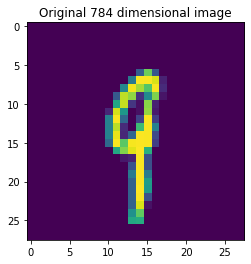

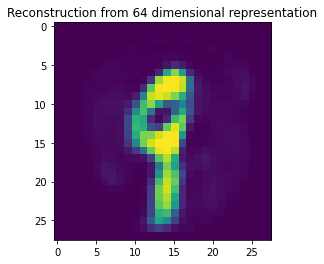

Epoch 13, Iteration 747 -- Loss: 0.014133
Epoch 13, Iteration 748 -- Loss: 0.015253
Epoch 13, Iteration 749 -- Loss: 0.014933
Epoch 13, Iteration 750 -- Loss: 0.014896
Epoch 13, Iteration 751 -- Loss: 0.013460
Epoch 13, Iteration 752 -- Loss: 0.013068
Epoch 13, Iteration 753 -- Loss: 0.012398
Epoch 14, Iteration 754 -- Loss: 0.011807


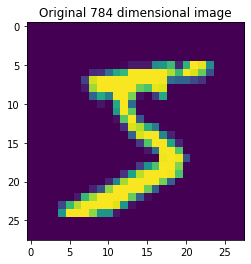

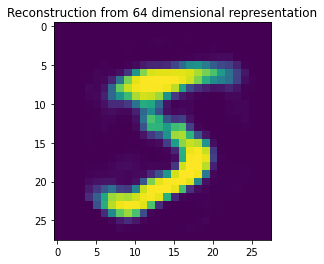

Epoch 14, Iteration 755 -- Loss: 0.013405
Epoch 14, Iteration 756 -- Loss: 0.012892
Epoch 14, Iteration 757 -- Loss: 0.012262
Epoch 14, Iteration 758 -- Loss: 0.012607
Epoch 14, Iteration 759 -- Loss: 0.012868
Epoch 14, Iteration 760 -- Loss: 0.013881
Epoch 14, Iteration 761 -- Loss: 0.013925
Epoch 14, Iteration 762 -- Loss: 0.012792
Epoch 14, Iteration 763 -- Loss: 0.013101
Epoch 14, Iteration 764 -- Loss: 0.012111


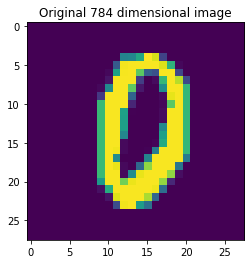

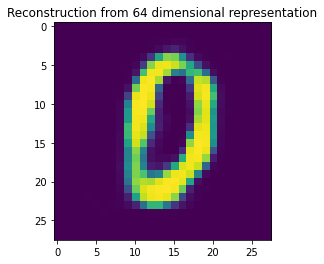

Epoch 14, Iteration 765 -- Loss: 0.012828
Epoch 14, Iteration 766 -- Loss: 0.014299
Epoch 14, Iteration 767 -- Loss: 0.015673
Epoch 14, Iteration 768 -- Loss: 0.015126
Epoch 14, Iteration 769 -- Loss: 0.013803
Epoch 14, Iteration 770 -- Loss: 0.013392
Epoch 14, Iteration 771 -- Loss: 0.012927
Epoch 14, Iteration 772 -- Loss: 0.012791
Epoch 14, Iteration 773 -- Loss: 0.012952
Epoch 14, Iteration 774 -- Loss: 0.013177


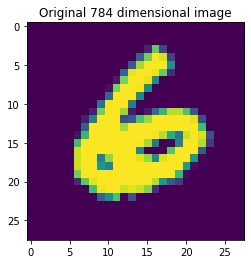

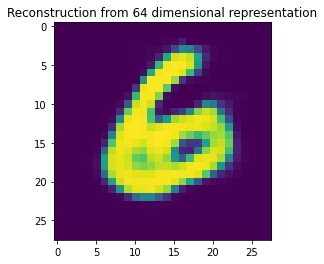

Epoch 14, Iteration 775 -- Loss: 0.014511
Epoch 14, Iteration 776 -- Loss: 0.013554
Epoch 14, Iteration 777 -- Loss: 0.013767
Epoch 14, Iteration 778 -- Loss: 0.013398
Epoch 14, Iteration 779 -- Loss: 0.013626
Epoch 14, Iteration 780 -- Loss: 0.013678
Epoch 14, Iteration 781 -- Loss: 0.013604
Epoch 14, Iteration 782 -- Loss: 0.014263
Epoch 14, Iteration 783 -- Loss: 0.014115
Epoch 14, Iteration 784 -- Loss: 0.013658


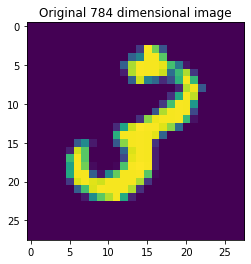

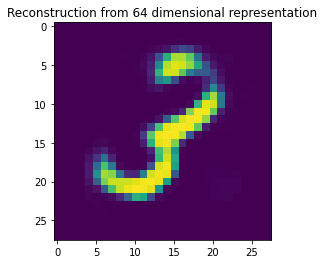

Epoch 14, Iteration 785 -- Loss: 0.012769
Epoch 14, Iteration 786 -- Loss: 0.012931
Epoch 14, Iteration 787 -- Loss: 0.012731
Epoch 14, Iteration 788 -- Loss: 0.013603
Epoch 14, Iteration 789 -- Loss: 0.017175
Epoch 14, Iteration 790 -- Loss: 0.018628
Epoch 14, Iteration 791 -- Loss: 0.016903
Epoch 14, Iteration 792 -- Loss: 0.015977
Epoch 14, Iteration 793 -- Loss: 0.013888
Epoch 14, Iteration 794 -- Loss: 0.014695


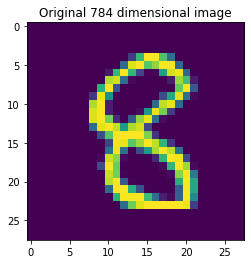

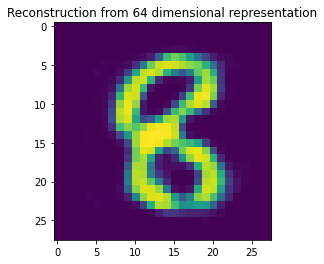

Epoch 14, Iteration 795 -- Loss: 0.014308
Epoch 14, Iteration 796 -- Loss: 0.014545
Epoch 14, Iteration 797 -- Loss: 0.013453
Epoch 14, Iteration 798 -- Loss: 0.014022
Epoch 14, Iteration 799 -- Loss: 0.013295
Epoch 14, Iteration 800 -- Loss: 0.013018
Epoch 14, Iteration 801 -- Loss: 0.012989
Epoch 14, Iteration 802 -- Loss: 0.013700
Epoch 14, Iteration 803 -- Loss: 0.013531
Epoch 14, Iteration 804 -- Loss: 0.014065


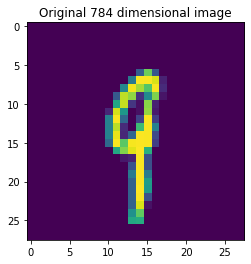

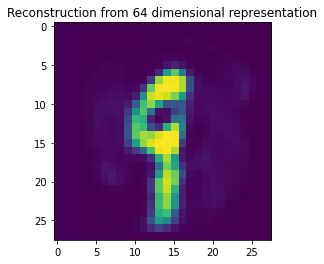

Epoch 14, Iteration 805 -- Loss: 0.013129
Epoch 14, Iteration 806 -- Loss: 0.014365
Epoch 14, Iteration 807 -- Loss: 0.014387
Epoch 14, Iteration 808 -- Loss: 0.014540
Epoch 14, Iteration 809 -- Loss: 0.013364
Epoch 14, Iteration 810 -- Loss: 0.012921
Epoch 14, Iteration 811 -- Loss: 0.012231
Epoch 15, Iteration 812 -- Loss: 0.011733


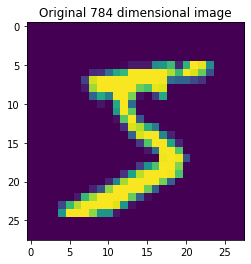

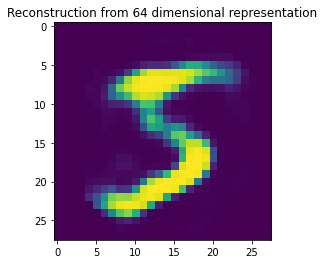

Epoch 15, Iteration 813 -- Loss: 0.013305
Epoch 15, Iteration 814 -- Loss: 0.013031
Epoch 15, Iteration 815 -- Loss: 0.012336
Epoch 15, Iteration 816 -- Loss: 0.012541
Epoch 15, Iteration 817 -- Loss: 0.012772
Epoch 15, Iteration 818 -- Loss: 0.013932
Epoch 15, Iteration 819 -- Loss: 0.013981
Epoch 15, Iteration 820 -- Loss: 0.012986
Epoch 15, Iteration 821 -- Loss: 0.013763
Epoch 15, Iteration 822 -- Loss: 0.013094


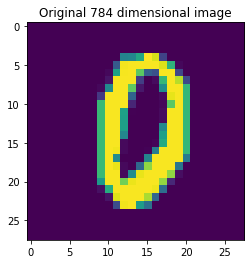

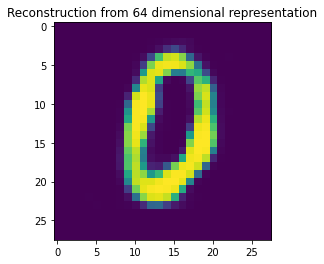

Epoch 15, Iteration 823 -- Loss: 0.014969
Epoch 15, Iteration 824 -- Loss: 0.015921
Epoch 15, Iteration 825 -- Loss: 0.017052
Epoch 15, Iteration 826 -- Loss: 0.014953
Epoch 15, Iteration 827 -- Loss: 0.013164
Epoch 15, Iteration 828 -- Loss: 0.012603
Epoch 15, Iteration 829 -- Loss: 0.012240
Epoch 15, Iteration 830 -- Loss: 0.012140
Epoch 15, Iteration 831 -- Loss: 0.012115
Epoch 15, Iteration 832 -- Loss: 0.012139


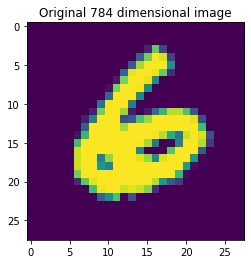

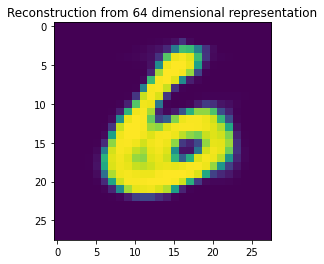

Epoch 15, Iteration 833 -- Loss: 0.013546
Epoch 15, Iteration 834 -- Loss: 0.012461
Epoch 15, Iteration 835 -- Loss: 0.012797
Epoch 15, Iteration 836 -- Loss: 0.012780
Epoch 15, Iteration 837 -- Loss: 0.013361
Epoch 15, Iteration 838 -- Loss: 0.013500
Epoch 15, Iteration 839 -- Loss: 0.013380
Epoch 15, Iteration 840 -- Loss: 0.014101
Epoch 15, Iteration 841 -- Loss: 0.014229
Epoch 15, Iteration 842 -- Loss: 0.013423


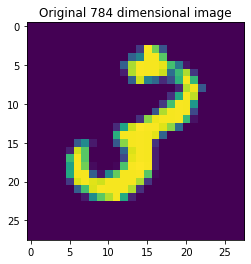

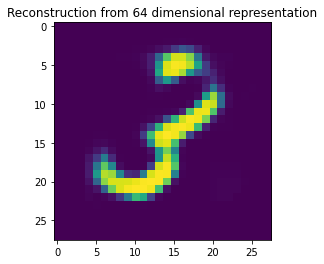

Epoch 15, Iteration 843 -- Loss: 0.012206
Epoch 15, Iteration 844 -- Loss: 0.012251
Epoch 15, Iteration 845 -- Loss: 0.012100
Epoch 15, Iteration 846 -- Loss: 0.012808
Epoch 15, Iteration 847 -- Loss: 0.016189
Epoch 15, Iteration 848 -- Loss: 0.017051
Epoch 15, Iteration 849 -- Loss: 0.015766
Epoch 15, Iteration 850 -- Loss: 0.015001
Epoch 15, Iteration 851 -- Loss: 0.013222
Epoch 15, Iteration 852 -- Loss: 0.014189


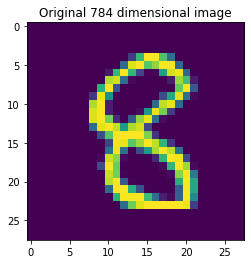

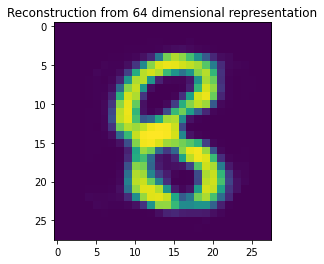

Epoch 15, Iteration 853 -- Loss: 0.013984
Epoch 15, Iteration 854 -- Loss: 0.014373
Epoch 15, Iteration 855 -- Loss: 0.013248
Epoch 15, Iteration 856 -- Loss: 0.013838
Epoch 15, Iteration 857 -- Loss: 0.013123
Epoch 15, Iteration 858 -- Loss: 0.012779
Epoch 15, Iteration 859 -- Loss: 0.012772
Epoch 15, Iteration 860 -- Loss: 0.013627
Epoch 15, Iteration 861 -- Loss: 0.013438
Epoch 15, Iteration 862 -- Loss: 0.014138


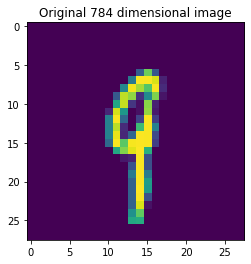

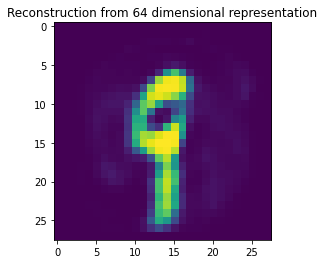

Epoch 15, Iteration 863 -- Loss: 0.012949
Epoch 15, Iteration 864 -- Loss: 0.013989
Epoch 15, Iteration 865 -- Loss: 0.013934
Epoch 15, Iteration 866 -- Loss: 0.014141
Epoch 15, Iteration 867 -- Loss: 0.012923
Epoch 15, Iteration 868 -- Loss: 0.012545
Epoch 15, Iteration 869 -- Loss: 0.011797
Epoch 16, Iteration 870 -- Loss: 0.011273


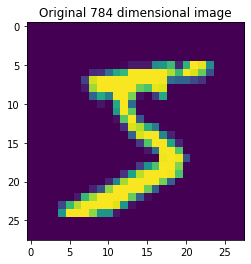

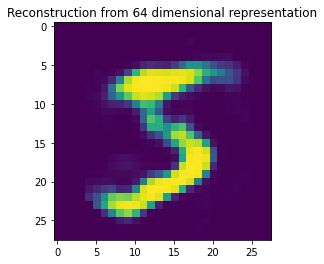

Epoch 16, Iteration 871 -- Loss: 0.012627
Epoch 16, Iteration 872 -- Loss: 0.012304
Epoch 16, Iteration 873 -- Loss: 0.011668
Epoch 16, Iteration 874 -- Loss: 0.011887
Epoch 16, Iteration 875 -- Loss: 0.011997
Epoch 16, Iteration 876 -- Loss: 0.012900
Epoch 16, Iteration 877 -- Loss: 0.012939
Epoch 16, Iteration 878 -- Loss: 0.011950
Epoch 16, Iteration 879 -- Loss: 0.012361
Epoch 16, Iteration 880 -- Loss: 0.011604


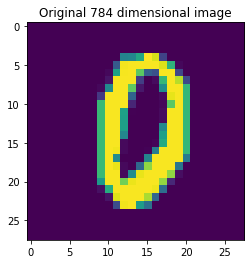

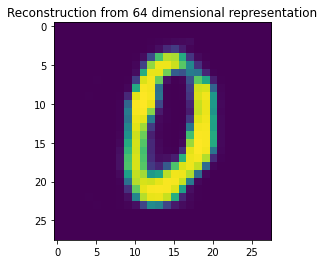

Epoch 16, Iteration 881 -- Loss: 0.012899
Epoch 16, Iteration 882 -- Loss: 0.014239
Epoch 16, Iteration 883 -- Loss: 0.016109
Epoch 16, Iteration 884 -- Loss: 0.014647
Epoch 16, Iteration 885 -- Loss: 0.012817
Epoch 16, Iteration 886 -- Loss: 0.012314
Epoch 16, Iteration 887 -- Loss: 0.011883
Epoch 16, Iteration 888 -- Loss: 0.011731
Epoch 16, Iteration 889 -- Loss: 0.011639
Epoch 16, Iteration 890 -- Loss: 0.011686


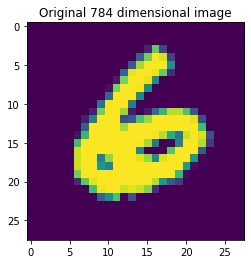

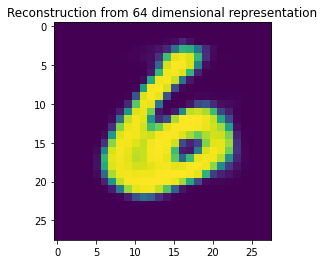

Epoch 16, Iteration 891 -- Loss: 0.012966
Epoch 16, Iteration 892 -- Loss: 0.012020
Epoch 16, Iteration 893 -- Loss: 0.012323
Epoch 16, Iteration 894 -- Loss: 0.012157
Epoch 16, Iteration 895 -- Loss: 0.012543
Epoch 16, Iteration 896 -- Loss: 0.012785
Epoch 16, Iteration 897 -- Loss: 0.012769
Epoch 16, Iteration 898 -- Loss: 0.013191
Epoch 16, Iteration 899 -- Loss: 0.013867
Epoch 16, Iteration 900 -- Loss: 0.013125


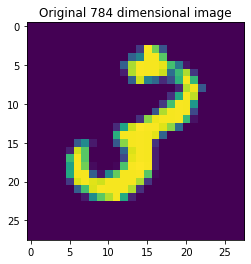

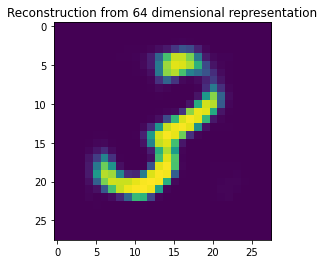

Epoch 16, Iteration 901 -- Loss: 0.011895
Epoch 16, Iteration 902 -- Loss: 0.011700
Epoch 16, Iteration 903 -- Loss: 0.011578
Epoch 16, Iteration 904 -- Loss: 0.012093
Epoch 16, Iteration 905 -- Loss: 0.015321
Epoch 16, Iteration 906 -- Loss: 0.016005
Epoch 16, Iteration 907 -- Loss: 0.015366
Epoch 16, Iteration 908 -- Loss: 0.014729
Epoch 16, Iteration 909 -- Loss: 0.013289
Epoch 16, Iteration 910 -- Loss: 0.014357


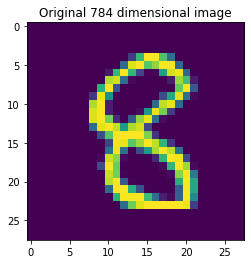

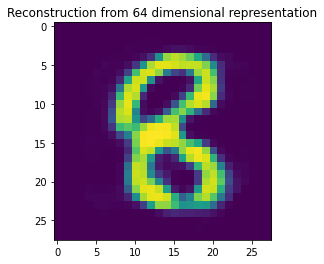

Epoch 16, Iteration 911 -- Loss: 0.014317
Epoch 16, Iteration 912 -- Loss: 0.015296
Epoch 16, Iteration 913 -- Loss: 0.013690
Epoch 16, Iteration 914 -- Loss: 0.014201
Epoch 16, Iteration 915 -- Loss: 0.013216
Epoch 16, Iteration 916 -- Loss: 0.012806
Epoch 16, Iteration 917 -- Loss: 0.012742
Epoch 16, Iteration 918 -- Loss: 0.013738
Epoch 16, Iteration 919 -- Loss: 0.013309
Epoch 16, Iteration 920 -- Loss: 0.013790


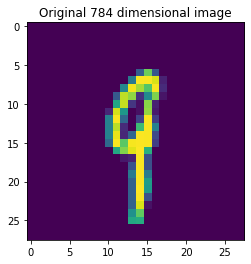

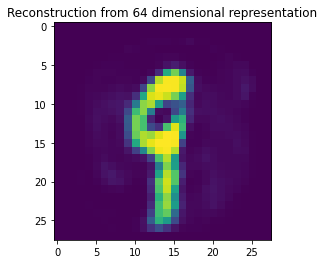

Epoch 16, Iteration 921 -- Loss: 0.012458
Epoch 16, Iteration 922 -- Loss: 0.013394
Epoch 16, Iteration 923 -- Loss: 0.013203
Epoch 16, Iteration 924 -- Loss: 0.013343
Epoch 16, Iteration 925 -- Loss: 0.012341
Epoch 16, Iteration 926 -- Loss: 0.012040
Epoch 16, Iteration 927 -- Loss: 0.011332
Epoch 17, Iteration 928 -- Loss: 0.010808


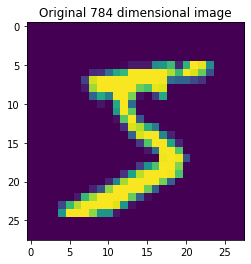

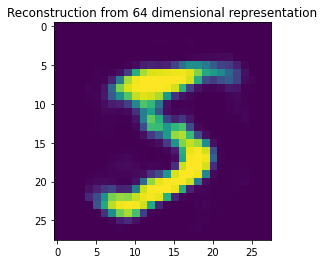

Epoch 17, Iteration 929 -- Loss: 0.012027
Epoch 17, Iteration 930 -- Loss: 0.011674
Epoch 17, Iteration 931 -- Loss: 0.011180
Epoch 17, Iteration 932 -- Loss: 0.011397
Epoch 17, Iteration 933 -- Loss: 0.011540
Epoch 17, Iteration 934 -- Loss: 0.012504
Epoch 17, Iteration 935 -- Loss: 0.012563
Epoch 17, Iteration 936 -- Loss: 0.011462
Epoch 17, Iteration 937 -- Loss: 0.011698
Epoch 17, Iteration 938 -- Loss: 0.010749


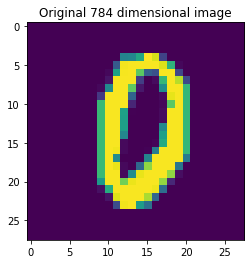

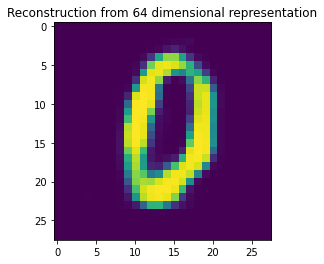

Epoch 17, Iteration 939 -- Loss: 0.011409
Epoch 17, Iteration 940 -- Loss: 0.012792
Epoch 17, Iteration 941 -- Loss: 0.014363
Epoch 17, Iteration 942 -- Loss: 0.013713
Epoch 17, Iteration 943 -- Loss: 0.012447
Epoch 17, Iteration 944 -- Loss: 0.012235
Epoch 17, Iteration 945 -- Loss: 0.011972
Epoch 17, Iteration 946 -- Loss: 0.011917
Epoch 17, Iteration 947 -- Loss: 0.012104
Epoch 17, Iteration 948 -- Loss: 0.012681


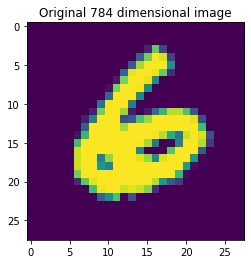

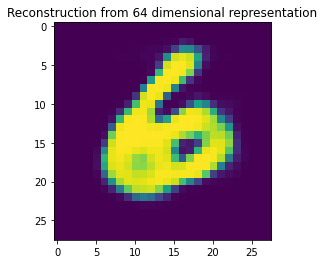

Epoch 17, Iteration 949 -- Loss: 0.013824
Epoch 17, Iteration 950 -- Loss: 0.013052
Epoch 17, Iteration 951 -- Loss: 0.013253
Epoch 17, Iteration 952 -- Loss: 0.012479
Epoch 17, Iteration 953 -- Loss: 0.012458
Epoch 17, Iteration 954 -- Loss: 0.012400
Epoch 17, Iteration 955 -- Loss: 0.012401
Epoch 17, Iteration 956 -- Loss: 0.012959
Epoch 17, Iteration 957 -- Loss: 0.012733
Epoch 17, Iteration 958 -- Loss: 0.012314


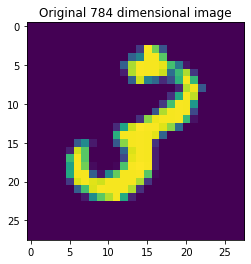

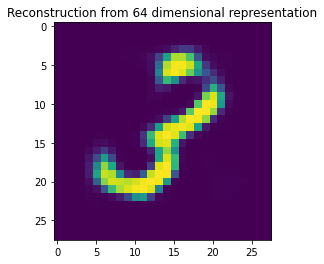

Epoch 17, Iteration 959 -- Loss: 0.011462
Epoch 17, Iteration 960 -- Loss: 0.011551
Epoch 17, Iteration 961 -- Loss: 0.011543
Epoch 17, Iteration 962 -- Loss: 0.012531
Epoch 17, Iteration 963 -- Loss: 0.015808
Epoch 17, Iteration 964 -- Loss: 0.017599
Epoch 17, Iteration 965 -- Loss: 0.016084
Epoch 17, Iteration 966 -- Loss: 0.015206
Epoch 17, Iteration 967 -- Loss: 0.013109
Epoch 17, Iteration 968 -- Loss: 0.013950


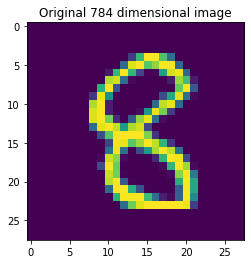

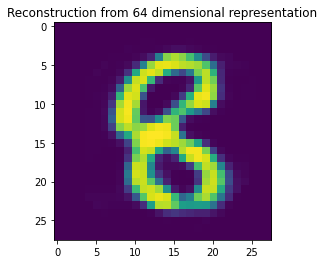

Epoch 17, Iteration 969 -- Loss: 0.013502
Epoch 17, Iteration 970 -- Loss: 0.013622
Epoch 17, Iteration 971 -- Loss: 0.012333
Epoch 17, Iteration 972 -- Loss: 0.012853
Epoch 17, Iteration 973 -- Loss: 0.012025
Epoch 17, Iteration 974 -- Loss: 0.011794
Epoch 17, Iteration 975 -- Loss: 0.011725
Epoch 17, Iteration 976 -- Loss: 0.012228
Epoch 17, Iteration 977 -- Loss: 0.012088
Epoch 17, Iteration 978 -- Loss: 0.012657


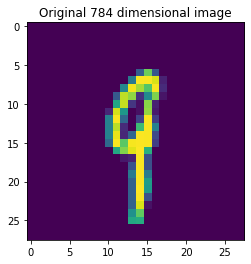

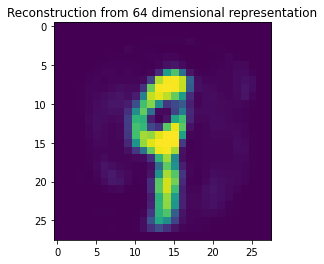

Epoch 17, Iteration 979 -- Loss: 0.011664
Epoch 17, Iteration 980 -- Loss: 0.012702
Epoch 17, Iteration 981 -- Loss: 0.012821
Epoch 17, Iteration 982 -- Loss: 0.013397
Epoch 17, Iteration 983 -- Loss: 0.012251
Epoch 17, Iteration 984 -- Loss: 0.012035
Epoch 17, Iteration 985 -- Loss: 0.011267
Epoch 18, Iteration 986 -- Loss: 0.010830


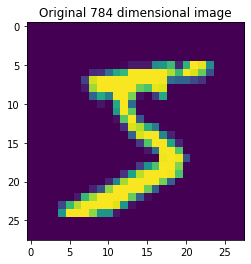

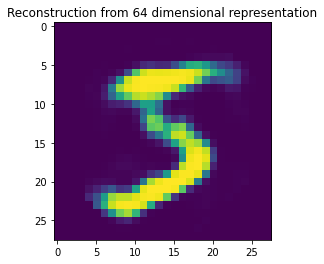

Epoch 18, Iteration 987 -- Loss: 0.011890
Epoch 18, Iteration 988 -- Loss: 0.011716
Epoch 18, Iteration 989 -- Loss: 0.011096
Epoch 18, Iteration 990 -- Loss: 0.011288
Epoch 18, Iteration 991 -- Loss: 0.011457
Epoch 18, Iteration 992 -- Loss: 0.012709
Epoch 18, Iteration 993 -- Loss: 0.012479
Epoch 18, Iteration 994 -- Loss: 0.011403
Epoch 18, Iteration 995 -- Loss: 0.011744
Epoch 18, Iteration 996 -- Loss: 0.010972


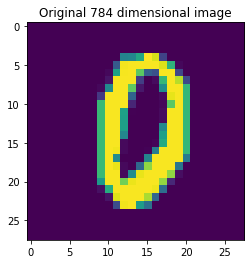

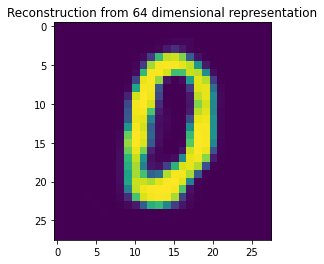

Epoch 18, Iteration 997 -- Loss: 0.012193
Epoch 18, Iteration 998 -- Loss: 0.013825
Epoch 18, Iteration 999 -- Loss: 0.015709
Epoch 18, Iteration 1000 -- Loss: 0.014843
Epoch 18, Iteration 1001 -- Loss: 0.013084
Epoch 18, Iteration 1002 -- Loss: 0.012420
Epoch 18, Iteration 1003 -- Loss: 0.011793
Epoch 18, Iteration 1004 -- Loss: 0.011374
Epoch 18, Iteration 1005 -- Loss: 0.011103
Epoch 18, Iteration 1006 -- Loss: 0.010924


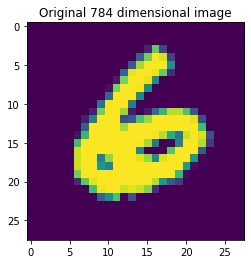

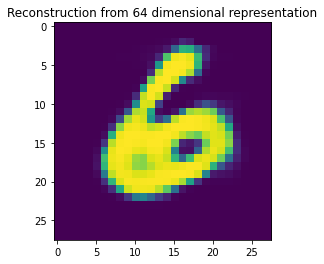

Epoch 18, Iteration 1007 -- Loss: 0.011942
Epoch 18, Iteration 1008 -- Loss: 0.010967
Epoch 18, Iteration 1009 -- Loss: 0.011404
Epoch 18, Iteration 1010 -- Loss: 0.011339
Epoch 18, Iteration 1011 -- Loss: 0.012081
Epoch 18, Iteration 1012 -- Loss: 0.012455
Epoch 18, Iteration 1013 -- Loss: 0.012406
Epoch 18, Iteration 1014 -- Loss: 0.012953
Epoch 18, Iteration 1015 -- Loss: 0.013806
Epoch 18, Iteration 1016 -- Loss: 0.013060


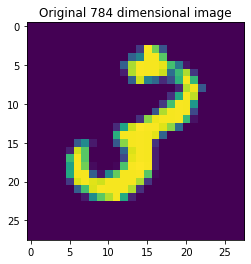

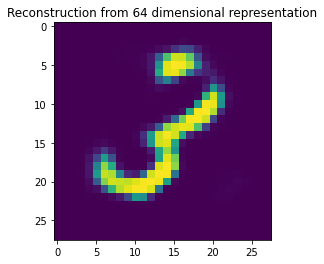

Epoch 18, Iteration 1017 -- Loss: 0.011354
Epoch 18, Iteration 1018 -- Loss: 0.010963
Epoch 18, Iteration 1019 -- Loss: 0.010662
Epoch 18, Iteration 1020 -- Loss: 0.010896
Epoch 18, Iteration 1021 -- Loss: 0.013133
Epoch 18, Iteration 1022 -- Loss: 0.012884
Epoch 18, Iteration 1023 -- Loss: 0.012983
Epoch 18, Iteration 1024 -- Loss: 0.013281
Epoch 18, Iteration 1025 -- Loss: 0.012847
Epoch 18, Iteration 1026 -- Loss: 0.013094


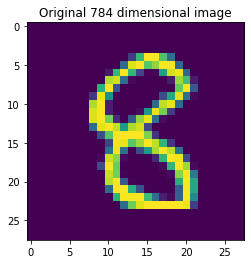

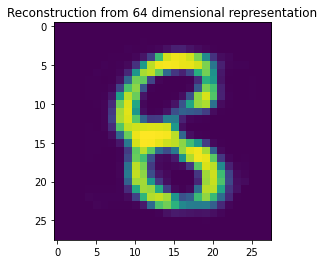

Epoch 18, Iteration 1027 -- Loss: 0.012179
Epoch 18, Iteration 1028 -- Loss: 0.012160
Epoch 18, Iteration 1029 -- Loss: 0.012092
Epoch 18, Iteration 1030 -- Loss: 0.012832
Epoch 18, Iteration 1031 -- Loss: 0.012279
Epoch 18, Iteration 1032 -- Loss: 0.012453
Epoch 18, Iteration 1033 -- Loss: 0.012889
Epoch 18, Iteration 1034 -- Loss: 0.015042
Epoch 18, Iteration 1035 -- Loss: 0.015037
Epoch 18, Iteration 1036 -- Loss: 0.016508


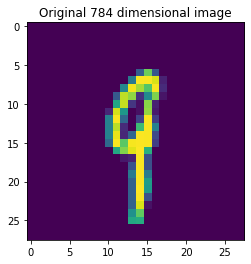

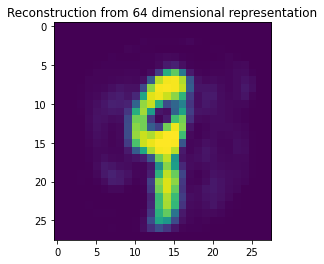

Epoch 18, Iteration 1037 -- Loss: 0.014609
Epoch 18, Iteration 1038 -- Loss: 0.015802
Epoch 18, Iteration 1039 -- Loss: 0.014240
Epoch 18, Iteration 1040 -- Loss: 0.014053
Epoch 18, Iteration 1041 -- Loss: 0.011949
Epoch 18, Iteration 1042 -- Loss: 0.011581
Epoch 18, Iteration 1043 -- Loss: 0.010834
Epoch 19, Iteration 1044 -- Loss: 0.010349


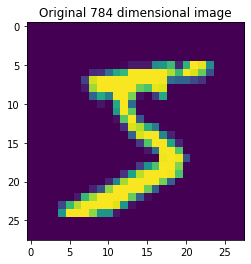

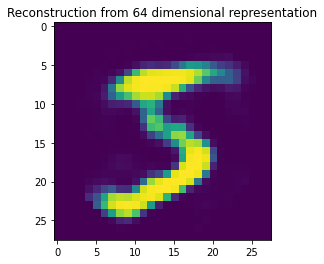

Epoch 19, Iteration 1045 -- Loss: 0.011329
Epoch 19, Iteration 1046 -- Loss: 0.010962
Epoch 19, Iteration 1047 -- Loss: 0.010541
Epoch 19, Iteration 1048 -- Loss: 0.010841
Epoch 19, Iteration 1049 -- Loss: 0.010956
Epoch 19, Iteration 1050 -- Loss: 0.011910
Epoch 19, Iteration 1051 -- Loss: 0.011961
Epoch 19, Iteration 1052 -- Loss: 0.011064
Epoch 19, Iteration 1053 -- Loss: 0.011450
Epoch 19, Iteration 1054 -- Loss: 0.010529


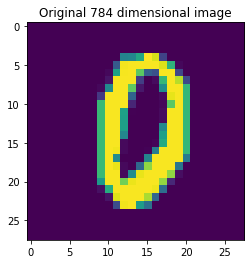

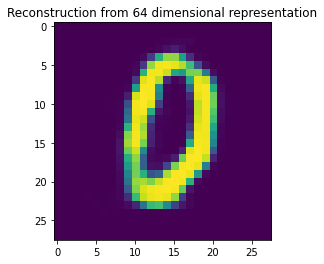

Epoch 19, Iteration 1055 -- Loss: 0.011465
Epoch 19, Iteration 1056 -- Loss: 0.012708
Epoch 19, Iteration 1057 -- Loss: 0.013984
Epoch 19, Iteration 1058 -- Loss: 0.013248
Epoch 19, Iteration 1059 -- Loss: 0.011867
Epoch 19, Iteration 1060 -- Loss: 0.011412
Epoch 19, Iteration 1061 -- Loss: 0.011155
Epoch 19, Iteration 1062 -- Loss: 0.010929
Epoch 19, Iteration 1063 -- Loss: 0.010854
Epoch 19, Iteration 1064 -- Loss: 0.011109


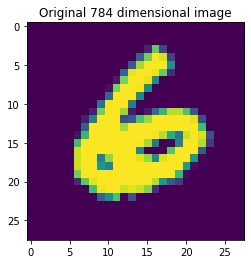

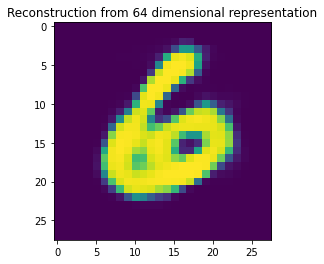

Epoch 19, Iteration 1065 -- Loss: 0.012206
Epoch 19, Iteration 1066 -- Loss: 0.011298
Epoch 19, Iteration 1067 -- Loss: 0.011462
Epoch 19, Iteration 1068 -- Loss: 0.011116
Epoch 19, Iteration 1069 -- Loss: 0.011193
Epoch 19, Iteration 1070 -- Loss: 0.011456
Epoch 19, Iteration 1071 -- Loss: 0.011566
Epoch 19, Iteration 1072 -- Loss: 0.012500
Epoch 19, Iteration 1073 -- Loss: 0.012158
Epoch 19, Iteration 1074 -- Loss: 0.011923


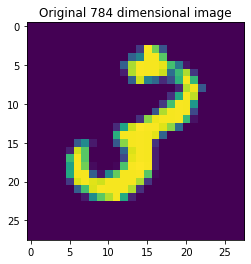

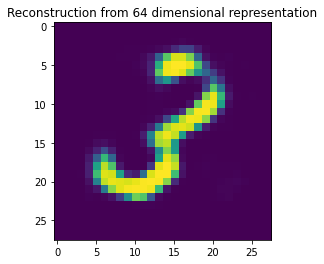

Epoch 19, Iteration 1075 -- Loss: 0.011375
Epoch 19, Iteration 1076 -- Loss: 0.011895
Epoch 19, Iteration 1077 -- Loss: 0.011993
Epoch 19, Iteration 1078 -- Loss: 0.013196
Epoch 19, Iteration 1079 -- Loss: 0.016570
Epoch 19, Iteration 1080 -- Loss: 0.018516
Epoch 19, Iteration 1081 -- Loss: 0.016577
Epoch 19, Iteration 1082 -- Loss: 0.014892
Epoch 19, Iteration 1083 -- Loss: 0.012552
Epoch 19, Iteration 1084 -- Loss: 0.013241


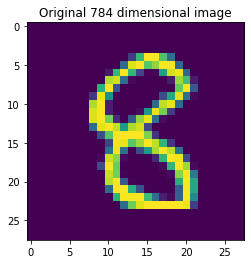

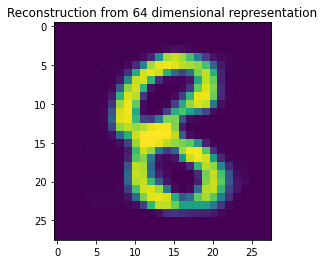

Epoch 19, Iteration 1085 -- Loss: 0.012588
Epoch 19, Iteration 1086 -- Loss: 0.012713
Epoch 19, Iteration 1087 -- Loss: 0.011692
Epoch 19, Iteration 1088 -- Loss: 0.012328
Epoch 19, Iteration 1089 -- Loss: 0.011451
Epoch 19, Iteration 1090 -- Loss: 0.011324
Epoch 19, Iteration 1091 -- Loss: 0.011203
Epoch 19, Iteration 1092 -- Loss: 0.011630
Epoch 19, Iteration 1093 -- Loss: 0.011352
Epoch 19, Iteration 1094 -- Loss: 0.011882


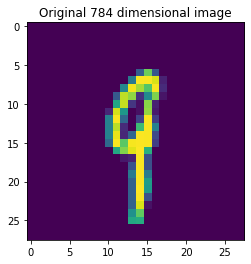

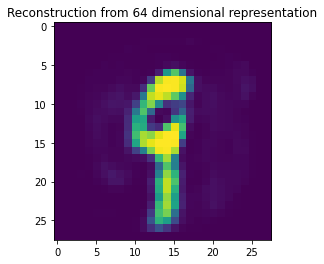

Epoch 19, Iteration 1095 -- Loss: 0.010833
Epoch 19, Iteration 1096 -- Loss: 0.011756
Epoch 19, Iteration 1097 -- Loss: 0.011782
Epoch 19, Iteration 1098 -- Loss: 0.012226
Epoch 19, Iteration 1099 -- Loss: 0.011431
Epoch 19, Iteration 1100 -- Loss: 0.011427
Epoch 19, Iteration 1101 -- Loss: 0.010688
Epoch 20, Iteration 1102 -- Loss: 0.010287


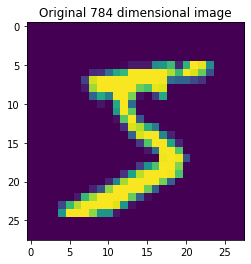

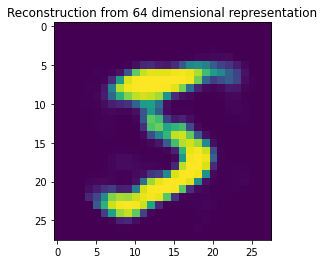

Epoch 20, Iteration 1103 -- Loss: 0.011224
Epoch 20, Iteration 1104 -- Loss: 0.011200
Epoch 20, Iteration 1105 -- Loss: 0.010638
Epoch 20, Iteration 1106 -- Loss: 0.010781
Epoch 20, Iteration 1107 -- Loss: 0.011023
Epoch 20, Iteration 1108 -- Loss: 0.012291
Epoch 20, Iteration 1109 -- Loss: 0.012033
Epoch 20, Iteration 1110 -- Loss: 0.010765
Epoch 20, Iteration 1111 -- Loss: 0.010888
Epoch 20, Iteration 1112 -- Loss: 0.009740


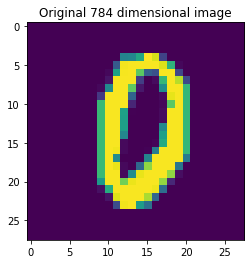

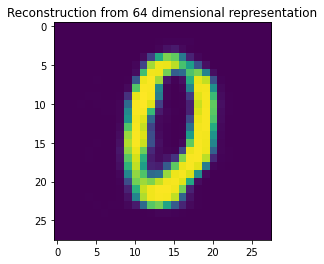

Epoch 20, Iteration 1113 -- Loss: 0.010237
Epoch 20, Iteration 1114 -- Loss: 0.011551
Epoch 20, Iteration 1115 -- Loss: 0.012657
Epoch 20, Iteration 1116 -- Loss: 0.012542
Epoch 20, Iteration 1117 -- Loss: 0.011512
Epoch 20, Iteration 1118 -- Loss: 0.011219
Epoch 20, Iteration 1119 -- Loss: 0.011012
Epoch 20, Iteration 1120 -- Loss: 0.010838
Epoch 20, Iteration 1121 -- Loss: 0.011000
Epoch 20, Iteration 1122 -- Loss: 0.011668


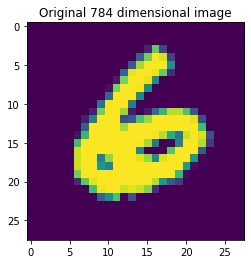

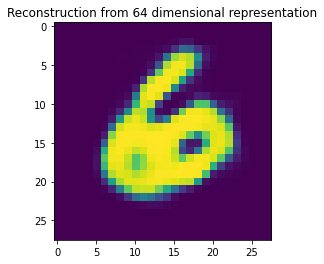

Epoch 20, Iteration 1123 -- Loss: 0.012799
Epoch 20, Iteration 1124 -- Loss: 0.012264
Epoch 20, Iteration 1125 -- Loss: 0.012459
Epoch 20, Iteration 1126 -- Loss: 0.011566
Epoch 20, Iteration 1127 -- Loss: 0.011255
Epoch 20, Iteration 1128 -- Loss: 0.011361
Epoch 20, Iteration 1129 -- Loss: 0.011487
Epoch 20, Iteration 1130 -- Loss: 0.012276
Epoch 20, Iteration 1131 -- Loss: 0.012104
Epoch 20, Iteration 1132 -- Loss: 0.011673


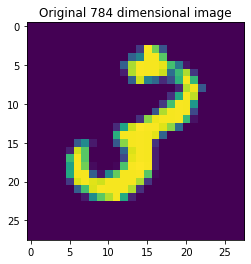

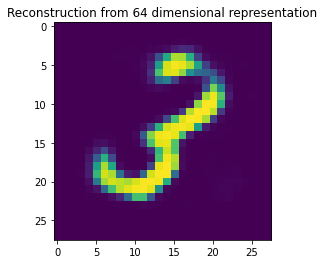

Epoch 20, Iteration 1133 -- Loss: 0.010787
Epoch 20, Iteration 1134 -- Loss: 0.010788
Epoch 20, Iteration 1135 -- Loss: 0.010711
Epoch 20, Iteration 1136 -- Loss: 0.011477
Epoch 20, Iteration 1137 -- Loss: 0.014566
Epoch 20, Iteration 1138 -- Loss: 0.016457
Epoch 20, Iteration 1139 -- Loss: 0.015667
Epoch 20, Iteration 1140 -- Loss: 0.015242
Epoch 20, Iteration 1141 -- Loss: 0.013061
Epoch 20, Iteration 1142 -- Loss: 0.014125


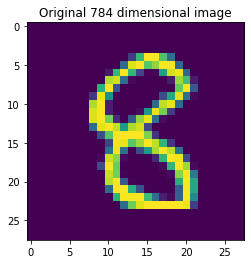

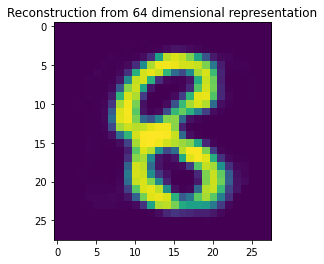

Epoch 20, Iteration 1143 -- Loss: 0.013217
Epoch 20, Iteration 1144 -- Loss: 0.013370
Epoch 20, Iteration 1145 -- Loss: 0.011674
Epoch 20, Iteration 1146 -- Loss: 0.012097
Epoch 20, Iteration 1147 -- Loss: 0.011120
Epoch 20, Iteration 1148 -- Loss: 0.010905
Epoch 20, Iteration 1149 -- Loss: 0.010793
Epoch 20, Iteration 1150 -- Loss: 0.011095
Epoch 20, Iteration 1151 -- Loss: 0.010888
Epoch 20, Iteration 1152 -- Loss: 0.011274


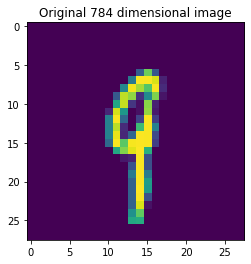

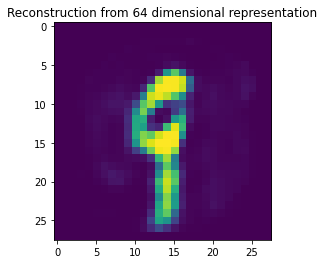

Epoch 20, Iteration 1153 -- Loss: 0.010426
Epoch 20, Iteration 1154 -- Loss: 0.011238
Epoch 20, Iteration 1155 -- Loss: 0.011428
Epoch 20, Iteration 1156 -- Loss: 0.011784
Epoch 20, Iteration 1157 -- Loss: 0.011166
Epoch 20, Iteration 1158 -- Loss: 0.011047
Epoch 20, Iteration 1159 -- Loss: 0.010413


In [ ]:
# If you are confused what h1, o1, D_w1, etc. means, 
#   refer to the notes at the top of the notebook.
# Otherwise, feel free to delete this comment.


for epoch in range(NUM_EPOCHS): 
    for n in range(ITERATIONS_PER_EPOCH):
        
        ## Sample batch from dataset
        batch_indices = range(n*BATCH_SIZE, n*BATCH_SIZE + BATCH_SIZE)   
        X_batch = X[batch_indices]

        ## Forward propagation
        h1 = np.dot(X_batch,w1)
        o1 = relu(h1)

        h2 = np.dot(o1,w2)
        o2 = sigmoid(h2)
        
      
        
        loss = mean_squared_error(o2, X_batch)
        
        print('Epoch %d, Iteration %d -- Loss: %.6f' % (epoch + 1, epoch * ITERATIONS_PER_EPOCH + n, loss))
            
        ## Backpropagation
        
        D_o2 = 2 * (o2 - X_batch)
        #since we use mean squared error we have 2 as a multiplier. To balance that we can multiply by 2.
        
        D_h2 = sigmoid_backward(D_o2, o2)
        
        D_o1 = np.dot(D_h2,w2.T)
        D_w2 = np.dot(D_h2.T,o1).T
        
        D_h1 = relu_backward(D_o1, o1)
        
        #D_o1 = np.dot(D_h1,w1.T)
        D_w1 = np.dot(D_h1.T,X_batch).T
        
        
        ## Parameter updates
        w1 -= D_w1 * LEARNING_RATE
        w2 -= D_w2 * LEARNING_RATE
        
        
        if n % 10 == 0:
            plt.figure()
            plt.title('Original %d dimensional image' % INPUT_SIZE)
            plt.imshow(X_batch[0].reshape(28, 28)); plt.show()
            
            
            plt.figure()
            plt.title('Reconstruction from %d dimensional representation' % HIDDEN_SIZE)
            plt.imshow(o2[0].reshape(28, 28)); plt.show()
        
    
    
